In [73]:
import zipfile
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#EXTRAÍNDO DADOS DAS PRESTAÇÕES DE CONTAS ELEITORAIS: https://dadosabertos.tse.jus.br/dataset/prestacao-de-contas-eleitorais-2024
#TODOS OS ARQUIVOS ESTÃO NA PASTA DO DRIVE DA PAUTA


# Caminho do arquivo zip
zip_file_path = 'D:\\Infoamazonia\\Eleições - 2024\\prestacao_de_contas_eleitorais_candidatos_2024.zip' #NOME DO ARQUIVO NA PASTA (prestacao_de_contas_eleitorais_candidatos_2024.zip)
extracted_folder = 'D:\\Infoamazonia\\Eleições - 2024\\prestacao_de_contas_eleitorais_candidatos_2024\\'

# Arquivos a serem extraídos
files_to_extract = ['receitas_candidatos_2024_BRASIL.csv']

# Extraindo os arquivos
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in files_to_extract:
        if file in zip_ref.namelist():
            zip_ref.extract(file, extracted_folder)
            print(f"Arquivo {file} extraído com sucesso.")
        else:
            print(f"Arquivo {file} não encontrado no arquivo zip.")
            raise FileNotFoundError(f"{file} não encontrado.")

df_receitas_candidatos = None

for file in files_to_extract:
    extracted_file_path = os.path.join(extracted_folder, file)
    
    if os.path.exists(extracted_file_path):
        if 'candidatos' in file:
            df_receitas_candidatos = pd.read_csv(extracted_file_path, encoding='latin1', sep=';')
            print(f"Arquivo {file} carregado com sucesso como 'df_receitas_candidatos'.")
    else:
        print(f"O arquivo {file} não foi extraído corretamente.")

if df_receitas_candidatos is not None:
    print("Primeiras linhas de 'df_receitas_candidatos':")
    print(df_receitas_candidatos.head())


Arquivo receitas_candidatos_2024_BRASIL.csv extraído com sucesso.
Arquivo receitas_candidatos_2024_BRASIL.csv carregado com sucesso como 'df_receitas_candidatos'.
Primeiras linhas de 'df_receitas_candidatos':
   DT_GERACAO HH_GERACAO  AA_ELEICAO  CD_TIPO_ELEICAO NM_TIPO_ELEICAO  \
0  15/10/2024   03:01:15        2024                2       ORDINÁRIA   
1  15/10/2024   03:01:15        2024                2       ORDINÁRIA   
2  15/10/2024   03:01:15        2024                2       ORDINÁRIA   
3  15/10/2024   03:01:15        2024                2       ORDINÁRIA   
4  15/10/2024   03:01:15        2024                2       ORDINÁRIA   

   CD_ELEICAO                DS_ELEICAO  DT_ELEICAO  ST_TURNO  \
0         619  Eleições Municipais 2024  06/10/2024         1   
1         619  Eleições Municipais 2024  06/10/2024         1   
2         619  Eleições Municipais 2024  06/10/2024         1   
3         619  Eleições Municipais 2024  06/10/2024         1   
4         619  Eleições Mun

In [75]:
#TRANSFORMANDO A COLUNA CPF DOS DOADORES DE CAMPANHA EM STRING

print(df_receitas_candidatos['NR_CPF_CNPJ_DOADOR'])
df_receitas_candidatos['NR_CPF_CNPJ_DOADOR'] = df_receitas_candidatos['NR_CPF_CNPJ_DOADOR'].astype(str)
print(df_receitas_candidatos['NR_CPF_CNPJ_DOADOR'])

0          2669787000104
1          2669787000104
2          2669787000104
3          2669787000104
4          2669787000104
               ...      
1382062       5619943666
1382063       1335966641
1382064       1335966641
1382065      65234456668
1382066      45920044934
Name: NR_CPF_CNPJ_DOADOR, Length: 1382067, dtype: int64
0          2669787000104
1          2669787000104
2          2669787000104
3          2669787000104
4          2669787000104
               ...      
1382062       5619943666
1382063       1335966641
1382064       1335966641
1382065      65234456668
1382066      45920044934
Name: NR_CPF_CNPJ_DOADOR, Length: 1382067, dtype: object


In [76]:
#CARREGANDO A TABELA GERAL DOS CANDIDATOS PARA PEGAR ALGUMAS INFORMAÇÕES ADICIONAIS COMO RESULTADO DA ELEIÇÃO, OCUPAÇÃO E OUTROS
#ESTA TABELA FOI BAIXADA DE https://dadosabertos.tse.jus.br/dataset/candidatos-2024
#O ARQUIVO CSV ESTÁ NA NOSS PASTA DO DRIVE: 'consulta_cand_2024_BRASIL.csv'


candidatos = pd.read_csv(r'D:\Infoamazonia\Eleições - 2024\dados\consulta_cand_2024_BRASIL.csv', encoding='latin1', sep=';')
candidatos_selecionados = candidatos[['SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'DS_SIT_TOT_TURNO', 'DS_OCUPACAO']]
df_receitas_candidatos = df_receitas_candidatos.merge(candidatos_selecionados, on='SQ_CANDIDATO', how='left')




In [77]:
# VERIFICANDO A INTEGRIDADE DOS DADOS 

dados_faltantes = df_receitas_candidatos.isnull().sum().reset_index()
dados_faltantes.columns = ['Column', 'Missing Values']
dados_faltantes['Integrity (%)'] = (1 - dados_faltantes['Missing Values'] / df_receitas_candidatos.shape[0]) * 100
dados_faltantes = dados_faltantes.sort_values(by='Missing Values', ascending=True)

print(dados_faltantes.head(50))
valores_unicos = df_receitas_candidatos.nunique().reset_index()
valores_unicos.columns = ['Column', 'Unique Values']
valores_unicos = valores_unicos.sort_values(by='Unique Values', ascending=False)
print(valores_unicos.head(50))

                           Column  Missing Values  Integrity (%)
0                      DT_GERACAO               0          100.0
32             CD_ESPECIE_RECEITA               0          100.0
33             DS_ESPECIE_RECEITA               0          100.0
34                 CD_CNAE_DOADOR               0          100.0
35                 DS_CNAE_DOADOR               0          100.0
36             NR_CPF_CNPJ_DOADOR               0          100.0
37                      NM_DOADOR               0          100.0
38                  NM_DOADOR_RFB               0          100.0
39    CD_ESFERA_PARTIDARIA_DOADOR               0          100.0
40    DS_ESFERA_PARTIDARIA_DOADOR               0          100.0
41                   SG_UF_DOADOR               0          100.0
42            CD_MUNICIPIO_DOADOR               0          100.0
43            NM_MUNICIPIO_DOADOR               0          100.0
61               DS_SIT_TOT_TURNO               0          100.0
44            SQ_CANDIDAT

In [78]:
### carregando dados de multas ambientais e concatenando em um unico df
### os arquivos das multas por ano estão em FORMATO json dentro de um zip
## o arquivo foi baixado no portal dos dados abertos do IBAMAhttps://dadosabertos.ibama.gov.br/dataset/fiscalizacao-auto-de-infracao
## o arquivo baixado também estpá na nossa pasta do drive com o nome: 'auto_infracao_json.zip'



import zipfile
import pandas as pd
import os

# Caminho do arquivo zip
zip_file_path = 'D:\\Infoamazonia\\Infrações IBAMA\\auto_infracao_json.zip'

# Dicionário para armazenar os DataFrames dinamicamente
dataframes = {}

# Abrir o arquivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.endswith('.json'):  # Lê apenas arquivos com extensão .json
            file_name = os.path.splitext(file)[0]  # Remove a extensão .json
            print(f"Lendo o arquivo: {file}")
            try:
                with zip_ref.open(file) as f:
                    # Ler o arquivo JSON
                    df = pd.read_json(f, encoding='utf-8')
                    dataframes[file_name] = df  # Armazenar o DataFrame no dicionário com o nome do arquivo
                    print(f"DataFrame '{file_name}' salvo com sucesso!")  # Mensagem indicando o DataFrame salvo
            except pd.errors.EmptyDataError:
                print(f"Arquivo vazio ou sem dados: {file}")
            except ValueError as ve:
                print(f"Erro ao processar o arquivo {file}: {ve}")
            except Exception as e:
                print(f"Erro ao abrir o arquivo {file}: {e}")

# Lista para armazenar DataFrames normalizados
normalized_dfs = []

# Normalização de cada DataFrame
for name, df in dataframes.items():
    if 'data' in df.columns:  # Verifica se a coluna 'data' existe
        print(f"Normalizando o DataFrame: {name}")
        # Normalizar a coluna 'data' para criar um novo DataFrame
        data_normalized = pd.json_normalize(df['data'])
        # Se quiser concatenar com o DataFrame original, exceto a coluna 'data'
        combined_df = pd.concat([df.drop(columns=['data']), data_normalized], axis=1)
        normalized_dfs.append(combined_df)  # Adiciona o DataFrame normalizado à lista
        print(f"DataFrame normalizado '{name}' salvo com sucesso!")
    else:
        print(f"A coluna 'data' não foi encontrada em '{name}'.")

# Concatenar todos os DataFrames normalizados em um único DataFrame
infracoes_ibama = pd.concat(normalized_dfs, ignore_index=True)

# Exibir as primeiras linhas do DataFrame concatenado
print("DataFrame Normalizado Final:")
print(infracoes_ibama.head())
print(f"O DataFrame final contém {infracoes_ibama.shape[0]} linhas e {infracoes_ibama.shape[1]} colunas.")




Lendo o arquivo: auto_infracao_ano_1955.json
DataFrame 'auto_infracao_ano_1955' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1977.json
DataFrame 'auto_infracao_ano_1977' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1980.json
DataFrame 'auto_infracao_ano_1980' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1981.json
DataFrame 'auto_infracao_ano_1981' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1982.json
DataFrame 'auto_infracao_ano_1982' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1983.json
DataFrame 'auto_infracao_ano_1983' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1984.json
DataFrame 'auto_infracao_ano_1984' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1985.json
DataFrame 'auto_infracao_ano_1985' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1986.json
DataFrame 'auto_infracao_ano_1986' salvo com sucesso!
Lendo o arquivo: auto_infracao_ano_1987.json
DataFrame 'auto_infracao_ano_1987' salvo com sucesso!
Lendo o ar

In [79]:
#infracoes_ibama['CPF_CNPJ_INFRATOR']


In [80]:
#CORRIGINDO A COLUNA CPF DO INFRATOR PARA FAZER CRUZAMENTO COM A TABELA DAS DOAÇÕES NAS ELEIÇÕES DE 2024

infracoes_ibama['DAT_HORA_AUTO_INFRACAO'] = pd.to_datetime(infracoes_ibama['DAT_HORA_AUTO_INFRACAO'], errors='coerce')
infracoes_ibama['CPF_CNPJ_INFRATOR'] = infracoes_ibama['CPF_CNPJ_INFRATOR'].str.replace('.', '', regex=False)
infracoes_ibama['CPF_CNPJ_INFRATOR'] = infracoes_ibama['CPF_CNPJ_INFRATOR'].str.replace('-', '', regex=False)
infracoes_ibama['CPF_CNPJ_INFRATOR'] = infracoes_ibama['CPF_CNPJ_INFRATOR'].str.replace('/', '', regex=False)
infracoes_ibama['CPF_CNPJ_INFRATOR']

0            89776640044
1                   None
2                   None
3                   None
4            11475102291
               ...      
678871    04756631000196
678872       36365130104
678873              None
678874    10495102000189
678875    03852972001921
Name: CPF_CNPJ_INFRATOR, Length: 678876, dtype: object

In [81]:
#CRIANO UMA COLUNA PARA ANO DA INFRAÇÃO
#ESSA COLUNA FACILITA A CHECAGEM DOS INFRATORES NO SISTEMA DO IBAMA
#https://servicos.ibama.gov.br/ctf/publico/areasembargadas/ConsultaPublicaAreasEmbargadas.php

infracoes_ibama['DAT_HORA_AUTO_INFRACAO'] = pd.to_datetime(infracoes_ibama['DAT_HORA_AUTO_INFRACAO'], errors='coerce')
infracoes_ibama['ANO_INFRACAO'] = infracoes_ibama['DAT_HORA_AUTO_INFRACAO'].dt.year
infracoes_ibama['ANO_INFRACAO'] = infracoes_ibama['ANO_INFRACAO'].astype(str).str.replace('.0', '', regex=False)

In [82]:
# VERIFICANDO A INTEGRIDADE DOS DADOS 

missing_data_analysis = infracoes_ibama.isnull().sum().reset_index()
missing_data_analysis.columns = ['Column', 'Missing Values']
missing_data_analysis['Integrity (%)'] = (1 - missing_data_analysis['Missing Values'] / infracoes_ibama.shape[0]) * 100

# Ordenar por valores faltantes
missing_data_analysis = missing_data_analysis.sort_values(by='Missing Values', ascending=True)
print(missing_data_analysis.head(50))

# VALORES ÚNICOS POR COLUNA
# TEMOS 423.527 CPFS ÚNICOS UM DF COM 678.876 REGISTROS HÁ 255.349 (1/3) CPFS FALTANTES


unique_values_analysis = infracoes_ibama.nunique().reset_index()
unique_values_analysis.columns = ['Column', 'Unique Values']
unique_values_analysis = unique_values_analysis.sort_values(by='Unique Values', ascending=False)
print(unique_values_analysis.head(50))

                          Column  Missing Values  Integrity (%)
68                  ANO_INFRACAO               0     100.000000
25             NUM_AUTO_INFRACAO               0     100.000000
66                 SIT_CANCELADO               0     100.000000
15  ULTIMA_ATUALIZACAO_RELATORIO               0     100.000000
65        DAT_HORA_AUTO_INFRACAO               3      99.999558
13                     TIPO_AUTO              32      99.995286
24                     MUNICIPIO             267      99.960670
19                 COD_MUNICIPIO             267      99.960670
7                             UF             267      99.960670
31                 DT_LANCAMENTO             479      99.929442
6               DT_ULT_ALTERACAO             479      99.929442
33                 NOME_INFRATOR            1212      99.821470
35           NUM_PESSOA_INFRATOR            1897      99.720568
16         DES_STATUS_FORMULARIO            3706      99.454098
61             SEQ_AUTO_INFRACAO        

In [83]:
#CORRIGINDO AS COLUNAS DE VALORES DE RECEITA E DE MULTAS AMBIENTAIS

infracoes_ibama['VAL_AUTO_INFRACAO'] = infracoes_ibama['VAL_AUTO_INFRACAO'].str.replace('.', '', regex=False)
infracoes_ibama['VAL_AUTO_INFRACAO'] = infracoes_ibama['VAL_AUTO_INFRACAO'].str.replace(',', '.', regex=False)
infracoes_ibama['VAL_AUTO_INFRACAO'] = infracoes_ibama['VAL_AUTO_INFRACAO'].astype(float)


# Repetir o processo para 'VR_RECEITA'
df_receitas_candidatos['VR_RECEITA'] = df_receitas_candidatos['VR_RECEITA'].str.replace('.', '', regex=False)
df_receitas_candidatos['VR_RECEITA'] = df_receitas_candidatos['VR_RECEITA'].str.replace(',', '.', regex=False)
df_receitas_candidatos['VR_RECEITA'] = df_receitas_candidatos['VR_RECEITA'].astype(float)


print(infracoes_ibama['VAL_AUTO_INFRACAO'])
print(df_receitas_candidatos['VR_RECEITA'])

0           2400.0
1            107.0
2            107.0
3         130000.0
4          82275.0
            ...   
678871     17000.0
678872    120000.0
678873    211500.0
678874      4000.0
678875      4000.0
Name: VAL_AUTO_INFRACAO, Length: 678876, dtype: float64
0            900.0
1           1000.0
2           1240.0
3           1000.0
4            600.0
            ...   
1392224      165.0
1392225     1000.0
1392226     2500.0
1392227    15000.0
1392228      700.0
Name: VR_RECEITA, Length: 1392229, dtype: float64


In [84]:
#EXPORTANDO ARQUIVO COM TODAS AS INFRAÇÕES DO IBAMA EM UM UNICO ARQUIVO CSV
#ESTE ARQUIVO DAS MULTAS ESTÁ NESTE LINK DO DRIVE: https://drive.google.com/drive/folders/1r941K7uP0OZsjll3TdkLzT2JlLjcJPdG

infracoes_ibama.to_csv(r'D:\Infoamazonia\Infrações IBAMA\todas_infracoes.csv')

#infracoes_ibama.to_csv(r'D:\Infoamazonia\Infrações IBAMA\todas_infracoes_check.csv')

In [85]:
# Definindo as colunas desejadas do df_receitas_candidatos
colunas_desejadas = [
    'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'DS_CARGO', 
    'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 
    'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 
    'DS_ESPECIE_RECEITA', 'NR_CPF_CNPJ_DOADOR', 'NM_DOADOR', 'NM_DOADOR_RFB', 
    'DS_ESFERA_PARTIDARIA_DOADOR', 'SG_UF_DOADOR', 'CD_MUNICIPIO_DOADOR', 
    'NM_MUNICIPIO_DOADOR', 'SQ_CANDIDATO_DOADOR', 'NR_CANDIDATO_DOADOR', 
    'DS_CARGO_CANDIDATO_DOADOR', 'NR_PARTIDO_DOADOR', 'SG_PARTIDO_DOADOR', 
    'NM_PARTIDO_DOADOR', 'NR_RECIBO_DOACAO', 'NR_DOCUMENTO_DOACAO', 'SQ_RECEITA', 
    'DT_RECEITA', 'DS_RECEITA', 'VR_RECEITA', 'DS_NATUREZA_RECURSO_ESTIMAVEL', 
    'DS_GENERO', 'DS_COR_RACA', 'NM_URNA_CANDIDATO', 'DS_SIT_TOT_TURNO', 'DS_OCUPACAO'
]

# Filtrando o dataframe df_receitas_candidatos para conter apenas as colunas desejadas
df_receitas_candidatos_filtrado = df_receitas_candidatos[colunas_desejadas]

#Aqui nós estamos concatenando as informações das infrações em listas na tabela de prestação de contas

infracoes_agrupadas = infracoes_ibama.groupby('CPF_CNPJ_INFRATOR').agg({
    'CPF_CNPJ_INFRATOR': 'size',  
    'NOME_INFRATOR': 'first',  
    'VAL_AUTO_INFRACAO': 'sum',   # Soma dos valores de auto de infração
    'MUNICIPIO': lambda x: list(x),
    'UF': lambda x: list(x),
    'ANO_INFRACAO': lambda x: list(x),
    'DS_BIOMAS_ATINGIDOS': lambda x: list(x),
    'DES_AUTO_INFRACAO': lambda x: list(x),
    'SIT_CANCELADO': lambda x: list(x),
}).rename(columns={
    'CPF_CNPJ_INFRATOR': 'NUM_INFRACOES',  # Renomeia a coluna de contagem
    'VAL_AUTO_INFRACAO': 'SOMA_INFRACAO'  # Renomeia a coluna de soma
}).reset_index()

# Adicionando uma nova coluna que conta quantas vezes cada infrator doou para os candidatos
doadores_infratores_counts = df_receitas_candidatos.groupby('NR_CPF_CNPJ_DOADOR').size().reset_index(name='DOACOES_FEITAS')

doadores_infratores = pd.merge(
    df_receitas_candidatos_filtrado,
    infracoes_agrupadas,
    left_on='NR_CPF_CNPJ_DOADOR', 
    right_on='CPF_CNPJ_INFRATOR', 
    how='inner'  # Mantém apenas registros que têm correspondência
)

doadores_infratores = pd.merge(
    doadores_infratores,
    doadores_infratores_counts,
    left_on='NR_CPF_CNPJ_DOADOR',
    right_on='NR_CPF_CNPJ_DOADOR',
    how='left'  # Inclui todos os registros doadores
)

# Exportando o resultado para um CSV
# doadores_infratores.to_csv(r'D:\Infoamazonia\Eleições - 2024\doadores_infratores.csv', index=False)


#VISUALIZANDO TABELA GERAL DAS DOAÇÕES PROVENIENTES DE INFRATORES AMBIENTAIS 

doadores_infratores


,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,...,NUM_INFRACOES,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS
0,RN,30031,BARAÚNA,56409073000196,Vereador,200002006104,55333,MARIA NEUZA DA SILVA OLIVEIRA,-4,-4,...,3,IZAU BARBOZA DA SILVA FILHO,3300.0,"[BARAUNA, BARAUNA, BARAUNA]","[RN, RN, RN]","[2006, 2006, 2006]","[None, None, None]",[TER EM DEPOSITO 10 ST DE MADEIRA DA ESPECIE ...,"[N, N, N]",1
1,GO,92894,CALDAS NOVAS,56520956000179,Vereador,90002143622,30000,SAULO INACIO DA SILVA,-4,-4,...,1,FLVIO JOSE DIAS DE OLIVEIRA,1500.0,[CALDAS NOVAS],[GO],[2006],[None],"[UTILIZAR 01 HA. DE APP, SEM LICENÇA AMBIENTAL...",[N],1
2,CE,15890,CRUZ,56274908000148,Vereador,60001945112,11234,ESTEVAO VALDEMIR MEDEIROS,-4,-4,...,1,GLAYDSTON LUIZ FARIAS MUNIZ,175000.0,[CRUZ],[CE],[2017],"[Caatinga, Mata Atlantica]","[Destruir 24,2 hectares de vegetacao, objeto d...",[N],7
3,CE,15890,CRUZ,56275815000138,Prefeito,60001945224,40,JOSE WALDERY MUNIZ,-4,-4,...,1,GLAYDSTON LUIZ FARIAS MUNIZ,175000.0,[CRUZ],[CE],[2017],"[Caatinga, Mata Atlantica]","[Destruir 24,2 hectares de vegetacao, objeto d...",[N],7
4,CE,15890,CRUZ,56278750000184,Vereador,60001945111,11111,CLEIDIA FREIRES VIEIRA,-4,-4,...,1,GLAYDSTON LUIZ FARIAS MUNIZ,175000.0,[CRUZ],[CE],[2017],"[Caatinga, Mata Atlantica]","[Destruir 24,2 hectares de vegetacao, objeto d...",[N],7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,2,MARCELO BEZERRA GUERREIRO,2800.0,"[NATAL, NISIA FLORESTA]","[RN, RN]","[1998, 2016]","[None, Costeiro e Marinho]",[Por transportar Produtos Florestais sem Cober...,"[N, N]",3
3964,MG,54038,UBERLÂNDIA,56360974000130,Vereador,130001983986,77999,ROBERTO SIDNEI DA SILVEIRA,-4,-4,...,1,ROBERTO SIDNEI SILVEIRA,5000.0,[UBERLANDIA],[MG],[2008],[None],[MANTER EM CATIVEIRO ESPÉCIMES DA FAUNA SILVES...,[N],1
3965,MG,49573,PASSOS,56740535000153,Vereador,130002263219,22111,FABIO DE OLIVEIRA,-4,-4,...,1,FABIO DE OLIVEIRA,300.0,[CONSELHEIRO LAFAIETE],[MG],[2002],[None],[EFETUAR CORTE RASO SEM DESTOCA EM AREA DE MAT...,[N],5
3966,RN,18619,SENADOR GEORGINO AVELINO,56405852000113,Prefeito,200002004520,15,ANTONIO MARCOS FREIRE,-4,-4,...,1,ANTONIO MARCOS FREIRE,1500.0,[SENADOR GEORGINO AVELINO],[RN],[2001],[None],[POR DESTRUIR DESMATAR UMA ÁREA DE VEGETAÇÃO D...,[N],2


A PARTIR DAQUI FIZ ALGUMAS ANÁLISES PARA EXPLORAR A BASE

In [16]:
#QUANTOS INFRATORES FIZERAM DOAÇÕES NESTA CAMPANHA?

ranking_doadores = doadores_infratores.groupby('NOME_INFRATOR')['SQ_RECEITA'].count()
ranking_doadores = ranking_doadores.sort_values(ascending=False)
ranking_doadores.head(50)



NOME_INFRATOR
FRANCIS MARIS CRUZ                        151
FACEBOOK SERVIOS ONLINE DO BRASIL LTDA     98
DORIVAL CARLOS BORGA                       85
MISAEL ARTUR FERREIRA VARELLA              77
ALAILSO SOUSA VIANA                        71
LINDOMAR RESENDE SOARES                    60
TATIANI BUZZI SOARES                       57
JOS RICARDO REZEK                          56
FLORI LUIZ BINOTTI                         45
ROLAND TRENTINI                            44
DALTON BENONI MARTINI                      32
FRANCISCO ROBERTO TOMAZINI                 31
ZILAUDIO LUIZ PEREIRA                      24
EGON HOEPERS                               22
DIO BRUNETTA                               20
LUCAS RAULINO ALMEIDA                      19
CSAR ROBERTO SCHEVINSKI                    17
CARLOS ALBERTO CAPELETTI                   16
GUSTAVO ROCHA MARTINS                      14
REMI VITORINO SORGATTO                     13
MAURICIO CARDOSO TONH                      12
ANDRE LUIZ DUARTE TE

In [86]:


total_infratores = doadores_infratores['NOME_INFRATOR'].nunique()
print(f"Total de infratores que fizeram doações: {total_infratores}")
df_unico_receitas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')
doacoes_por_infrator = df_unico_receitas.groupby('NOME_INFRATOR').agg({
    'VR_RECEITA': ['count', 'sum']  # Conta o número de doações e soma os valores únicos das doações
}).reset_index()
doacoes_por_infrator.columns = ['NOME_INFRATOR', 'TOTAL_DOACOES', 'TOTAL_DOADO']
print("Número de doações feitas por cada infrator e o valor total doado:")
doacoes_por_infrator.sort_values(by='TOTAL_DOACOES', ascending=False, inplace=True)
doacoes_por_infrator.head(30)


Total de infratores que fizeram doações: 1898
Número de doações feitas por cada infrator e o valor total doado:


,NOME_INFRATOR,TOTAL_DOACOES,TOTAL_DOADO
618,FRANCIS MARIS CRUZ,151,864666.36
584,FACEBOOK SERVIOS ONLINE DO BRASIL LTDA,98,106290.00
442,DORIVAL CARLOS BORGA,85,60787.40
1405,MISAEL ARTUR FERREIRA VARELLA,77,473200.00
62,ALAILSO SOUSA VIANA,71,39100.00
1184,LINDOMAR RESENDE SOARES,60,108100.00
1749,TATIANI BUZZI SOARES,57,110900.00
1001,JOS RICARDO REZEK,52,3405000.00
612,FLORI LUIZ BINOTTI,45,49200.00
1638,ROLAND TRENTINI,44,25630.00


In [87]:
df_unicos = doadores_infratores.drop_duplicates(subset=['SQ_RECEITA'])

valores_por_candidato = df_unicos.groupby('NM_CANDIDATO').agg({
    'VR_RECEITA': 'sum',                
    'NM_DOADOR': lambda x: list(x),     
    'SQ_RECEITA': 'count',              
    'NM_UE': 'first',                   
    'SG_UF': 'first',                   
    'DS_CARGO': 'first',                
    'DS_SIT_TOT_TURNO': 'first',
    'DS_OCUPACAO': 'first'       
}).reset_index()

valores_por_candidato.rename(columns={
    'VR_RECEITA': 'TOTAL_RECEITA',
    'NM_DOADOR': 'LISTA_DOADORES',
    'SQ_RECEITA': 'TOTAL_DOACOES'
}, inplace=True)

valores_por_candidato = valores_por_candidato.sort_values(by='TOTAL_RECEITA', ascending=False)

print("Candidaturas que mais receberam valores de infratores:")
valores_por_candidato.head(20)


Candidaturas que mais receberam valores de infratores:


,NM_CANDIDATO,TOTAL_RECEITA,LISTA_DOADORES,TOTAL_DOACOES,NM_UE,SG_UF,DS_CARGO,DS_SIT_TOT_TURNO,DS_OCUPACAO
26,ADEMIR ORTIZ DE GOES,748000.00,"[ADEMIR ORTIZ DE GOES, ADEMIR ORTIZ DE GOES, N...",11,PRIMAVERA DO LESTE,MT,Prefeito,NÃO ELEITO,PRODUTOR AGROPECUÁRIO
1976,PAULO JOSÉ CORREIA,720000.00,"[CARLOS ERNESTO AUGUSTIN, CARLOS ERNESTO AUGUS...",3,RONDONÓPOLIS,MT,Prefeito,NÃO ELEITO,OUTROS
1797,MARLEI MENEZES FEIER MEZZONO,624976.04,"[NEREU MEZZOMO, NEREU MEZZOMO, NEREU MEZZOMO]",3,ARIQUEMES,RO,Prefeito,NÃO ELEITO,EMPRESÁRIO
558,DIEGO VAZ SORGATTO,582000.00,"[RENATO ROMEU SORGATTO, REMI VITORINO SORGATTO...",9,LUZIÂNIA,GO,Prefeito,ELEITO,PREFEITO
46,ADRIANE BARBOSA NOGUEIRA LOPES,550000.00,"[ALMIR DASPASQUALE, ALMIR DASPASQUALE]",2,CAMPO GRANDE,MS,Prefeito,#NULO#,PREFEITO
1912,OLAVO REMIGIO CONDÉ,539990.00,"[GERALDO REMIGIO CONDE, JOSE APARECIDO CONDE, ...",7,PARACATU,MG,Prefeito,NÃO ELEITO,PRODUTOR AGROPECUÁRIO
2462,WELLINGTON SOARES CARRIJO FILHO,524350.00,"[PAUL HENRI MADELAINE MARI, IOAV BLANCHE, SILM...",4,RIO VERDE,GO,Prefeito,ELEITO,MÉDICO
1179,JOAO CLEBER DE SOUZA TORRES,478500.00,"[JOSE RICARDO REZEK, JOSE RICARDO REZEK, JOSE ...",6,SÃO FÉLIX DO XINGU,PA,Prefeito,NÃO ELEITO,PREFEITO
875,FUAD JORGE NOMAN FILHO,440000.00,"[ANTONIO ADOVERLINO ANDRADE, SERGIO SANTOS SET...",7,BELO HORIZONTE,MG,Prefeito,#NULO#,PREFEITO
1839,MIGUEL VAZ RIBEIRO,416000.00,"[MARINO JOSE FRANZ, HILARIO RENATO PICCINI, HI...",4,LUCAS DO RIO VERDE,MT,Prefeito,ELEITO,EMPRESÁRIO


In [88]:
#CAMPANHAS QUE MAIS RECEBERAM DOAÇÕES DE  INFRATRES

#OBS: PABLO MARÇAL RECEBEU 175 DOAÇÕES DE INFRATORES AMBIENTAIS


df_unicos = doadores_infratores.drop_duplicates(subset=['SQ_RECEITA'])

valores_por_candidato = df_unicos.groupby('NM_CANDIDATO').agg({
    'VR_RECEITA': 'sum',                
    'NM_DOADOR': lambda x: list(x),    
    'SQ_RECEITA': 'count',              
    'NM_UE': 'first',                   
    'SG_UF': 'first',                   
    'DS_CARGO': 'first',                
    'DS_SIT_TOT_TURNO': 'first'         
}).reset_index()

valores_por_candidato.rename(columns={
    'VR_RECEITA': 'TOTAL_RECEITA',
    'NM_DOADOR': 'LISTA_DOADORES',
    'SQ_RECEITA': 'TOTAL_DOACOES'
}, inplace=True)

valores_por_candidato = valores_por_candidato.sort_values(by='TOTAL_DOACOES', ascending=False)

print("Candidaturas que mais receberam valores de infratores:")
valores_por_candidato[['NM_CANDIDATO', 'TOTAL_RECEITA', 'TOTAL_DOACOES', 'NM_UE', 'SG_UF', 'DS_CARGO', 'DS_SIT_TOT_TURNO']].head(30)


Candidaturas que mais receberam valores de infratores:


,NM_CANDIDATO,TOTAL_RECEITA,TOTAL_DOACOES,NM_UE,SG_UF,DS_CARGO,DS_SIT_TOT_TURNO
1940,PABLO HENRIQUE COSTA MARCAL,129218.25,175,SÃO PAULO,SP,Prefeito,NÃO ELEITO
485,CRISTINA REIS GRAEML,1660.00,20,CURITIBA,PR,Prefeito,#NULO#
26,ADEMIR ORTIZ DE GOES,748000.00,11,PRIMAVERA DO LESTE,MT,Prefeito,NÃO ELEITO
558,DIEGO VAZ SORGATTO,582000.00,9,LUZIÂNIA,GO,Prefeito,ELEITO
2490,WISER BARBOSA MOURA,16513.42,7,RIBEIRÃO CASCALHEIRA,MT,Prefeito,NÃO ELEITO
1711,MARCONE PEREIRA LACERDA,38600.00,7,ABEL FIGUEIREDO,PA,Prefeito,ELEITO
1758,MARIA DO CARMO MOREIRA OLIVEIRA AVALONE,180000.00,7,CUIABÁ,MT,Vereador,ELEITO POR QP
2303,TAINE EDUARDO DOS SANTOS,15500.00,7,CUPIRA,PE,Vereador,ELEITO POR QP
749,EVALDO VIEIRA DA SILVA,575.00,7,ANANINDEUA,PA,Vereador,SUPLENTE
875,FUAD JORGE NOMAN FILHO,440000.00,7,BELO HORIZONTE,MG,Prefeito,#NULO#


In [20]:
#Qual o valor devido pelos infratores pelas multas aplicadas?

doadores_infratores['SOMA_INFRACAO'].sum().apply(lambda x: f'{x:,.2f}')




5039407793.76

In [126]:

doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')

infratores_top_multas = doacoes_unicas.groupby('NOME_INFRATOR').agg({
    'SOMA_INFRACAO': 'sum',  
    'VR_RECEITA': 'sum',     
    'NM_CANDIDATO': lambda x: list(x.unique()),  
    'NM_CANDIDATO': 'count'  

}).reset_index()

infratores_top_multas = infratores_top_multas.sort_values(by='SOMA_INFRACAO', ascending=False)


infratores_top_multas['SOMA_INFRACAO'] = infratores_top_multas['SOMA_INFRACAO'].apply(lambda x: f'{x:,.2f}')
infratores_top_multas['VR_RECEITA'] = infratores_top_multas['VR_RECEITA'].apply(lambda x: f'{x:,.2f}')
print("Os 20  infratores com maior valor em multa que fizeram doações:")
infratores_top_multas[['NOME_INFRATOR', 'SOMA_INFRACAO', 'VR_RECEITA', 'NM_CANDIDATO']].head(20)



Os 20  infratores com maior valor em multa que fizeram doações:


,NOME_INFRATOR,SOMA_INFRACAO,VR_RECEITA,NM_CANDIDATO
584,FACEBOOK SERVIOS ONLINE DO BRASIL LTDA,"2,147,062,400.00","106,290.00",98
1184,LINDOMAR RESENDE SOARES,"558,284,022.00","108,100.00",60
1749,TATIANI BUZZI SOARES,"488,490,000.00","110,900.00",57
1640,ROMEU FROELICH,"278,586,000.00","225,000.00",8
1025,JOSE CARLOS RAMOS RODRIGUES,"209,308,959.60","12,500.00",2
388,CSAR ROBERTO SCHEVINSKI,"95,283,640.00","129,000.00",17
612,FLORI LUIZ BINOTTI,"73,125,000.00","49,200.00",45
618,FRANCIS MARIS CRUZ,"72,298,800.00","864,666.36",151
399,DANIEL MESSAC DE MORAIS,"67,085,000.00","7,000.00",1
238,ARMANDO CAYRES DE ALMEIDA,"45,224,757.12","394,000.00",6


In [125]:

doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')


infratores_top_doacoes = doacoes_unicas.groupby('NOME_INFRATOR').agg({
    'SOMA_INFRACAO': 'sum',  
    'VR_RECEITA': 'sum',     
    'NM_CANDIDATO': lambda x: list(x.unique())

}).reset_index()

infratores_top_doacoes = infratores_top_doacoes.sort_values(by='VR_RECEITA', ascending=False)


infratores_top_doacoes['SOMA_INFRACAO'] = infratores_top_doacoes['SOMA_INFRACAO'].apply(lambda x: f'{x:,.2f}')
infratores_top_doacoes['VR_RECEITA'] = infratores_top_doacoes['VR_RECEITA'].apply(lambda x: f'{x:,.2f}')
print("Os 20  infratores com maior valor em multa que fizeram doações:")
infratores_top_doacoes[['NOME_INFRATOR', 'SOMA_INFRACAO', 'VR_RECEITA']].head(20)



Os 20  infratores com maior valor em multa que fizeram doações:


,NOME_INFRATOR,SOMA_INFRACAO,VR_RECEITA
1001,JOS RICARDO REZEK,"2,456,064.00","3,405,000.00"
286,CARLOS ERNESTO AUGUSTIN,"877,450.00","980,000.00"
618,FRANCIS MARIS CRUZ,"72,298,800.00","864,666.36"
108,ALMIR DALPASQUALE,"300,000.00","700,000.00"
1427,NEREU MEZZOMO,"171,728.46","624,976.04"
983,JOS FRANCISCO DE FATIMA SANTOS,"1,794,303.00","605,000.00"
967,JOS APARECIDO CONDE,"158,160.00","523,640.00"
1576,REMI VITORINO SORGATTO,"325,000.00","503,250.00"
1405,MISAEL ARTUR FERREIRA VARELLA,"862,400.00","473,200.00"
238,ARMANDO CAYRES DE ALMEIDA,"45,224,757.12","394,000.00"


In [22]:
##Quais são os dez infratores com maior valor em multa que fizeram doações? Para quem foram estas doações?

top_infratores = doadores_infratores.groupby(['NOME_INFRATOR', 'NUM_INFRACOES', 'DOACOES_FEITAS'])['SOMA_INFRACAO'].sum()
top_infratores = top_infratores.sort_values(ascending=False)
top_infratores = top_infratores.apply(lambda x: f'{x:,.2f}')
top_infratores.head(20)


NOME_INFRATOR                           NUM_INFRACOES  DOACOES_FEITAS
FACEBOOK SERVIOS ONLINE DO BRASIL LTDA  5              98                2,147,062,400.00
LINDOMAR RESENDE SOARES                 4              60                  558,284,022.00
TATIANI BUZZI SOARES                    2              57                  488,490,000.00
ROMEU FROELICH                          10             8                   278,586,000.00
JOSE CARLOS RAMOS RODRIGUES             17             2                   209,308,959.60
CSAR ROBERTO SCHEVINSKI                 5              17                   95,283,640.00
FLORI LUIZ BINOTTI                      1              45                   73,125,000.00
FRANCIS MARIS CRUZ                      3              151                  72,298,800.00
DANIEL MESSAC DE MORAIS                 6              1                    67,085,000.00
ARMANDO CAYRES DE ALMEIDA               12             6                    45,224,757.12
JEFERSON PEREIRA PINTO        

In [23]:

doadores_multados = doadores_infratores.groupby('NOME_INFRATOR')['SOMA_INFRACAO'].sum().sort_values(ascending=False)
top_10 = doadores_multados.head(10)
top_10_formatted = top_10.apply(lambda x: f'{x:,.2f}')
doacoes_top_donors = doadores_infratores[doadores_infratores['NOME_INFRATOR'].isin(top_10.index)]

resultados = []

for infrator in top_10.index:
    doacoes = doacoes_top_donors[doacoes_top_donors['NOME_INFRATOR'] == infrator]
    total_doacoes = doacoes['VR_RECEITA'].sum()
    total_doacoes_formatted = f'{total_doacoes:,.2f}'
    
    resultados.append({
        'Infrator': infrator,
        'Total de Multas': top_10_formatted[infrator],
        'Total de Doações': total_doacoes_formatted,
        'Candidatos e Valores': doacoes[['NM_CANDIDATO', 'VR_RECEITA']].to_dict(orient='records')
    })

df_resultados = pd.DataFrame(resultados)
print("Top 10 Infratores com Multas e Doações:")
df_resultados


Top 10 Infratores com Multas e Doações:


,Infrator,Total de Multas,Total de Doações,Candidatos e Valores
0,FACEBOOK SERVIOS ONLINE DO BRASIL LTDA,"2,147,062,400.00","106,290.00","[{'NM_CANDIDATO': 'FABIANO MILITÃO ANANIAS', '..."
1,LINDOMAR RESENDE SOARES,"558,284,022.00","108,100.00",[{'NM_CANDIDATO': 'JOSE WILSON TEIXEIRA MOURAO...
2,TATIANI BUZZI SOARES,"488,490,000.00","110,900.00",[{'NM_CANDIDATO': 'JOSE WILSON TEIXEIRA MOURAO...
3,ROMEU FROELICH,"278,586,000.00","225,000.00","[{'NM_CANDIDATO': 'HONEY PINHEIRO MONTEL', 'VR..."
4,JOSE CARLOS RAMOS RODRIGUES,"209,308,959.60","12,500.00","[{'NM_CANDIDATO': 'CARLOS ROBERTO TOMAZETTO', ..."
5,CSAR ROBERTO SCHEVINSKI,"95,283,640.00","129,000.00","[{'NM_CANDIDATO': 'ESTELIO LUIZ NEGRI', 'VR_RE..."
6,FLORI LUIZ BINOTTI,"73,125,000.00","49,200.00",[{'NM_CANDIDATO': 'SUZANA DE ATAIDE SANTOS CAN...
7,FRANCIS MARIS CRUZ,"72,298,800.00","864,666.36","[{'NM_CANDIDATO': 'MARCILENE TAVARES MARTINS',..."
8,DANIEL MESSAC DE MORAIS,"67,085,000.00","7,000.00",[{'NM_CANDIDATO': 'THIALU RAPHAEL GUIOTTI LUST...
9,ARMANDO CAYRES DE ALMEIDA,"45,224,757.12","394,000.00","[{'NM_CANDIDATO': 'ANTONIO CAYRES DE ALMEIDA',..."


In [104]:
#CHECANDO AS DOAÇÕES DE UM INFRATOR ESPECÍFICO


print(f"Total de doações do infrator: {lindomar['Total de Doações'].values[0]}")


lindomar = df_resultados[df_resultados['Infrator'] == 'LINDOMAR RESENDE SOARES']
lindomar_result = lindomar['Candidatos e Valores']
tabela_candidatos = pd.DataFrame(lindomar_result.iloc[0])
print(tabela_candidatos)



Total de doações do infrator: 108,100.00
                             NM_CANDIDATO  VR_RECEITA
0             JOSE WILSON TEIXEIRA MOURAO       900.0
1                        ARISTOTELES KAWA       900.0
2                EDINALDO DOS SANTOS LIMA       900.0
3   DENISE ANTONIA GONCALVES BRITO VIEIRA       900.0
4              MAGNEIDE DE CARVALHO SILVA       900.0
5             JAGSON DE SOUSA VASCONCELOS       900.0
6        LUCAS ULIANA CARNEIRO DE ALMEIDA       900.0
7                   KELLY CRISTINA DESTRO     55000.0
8             LUIS CARLOS LIRA DOS SANTOS       900.0
9          ZACARIAS BARROS PIEDADE JUNIOR       900.0
10              ALDEMAR RENITO MAY JUNIOR       900.0
11         ADRIANA COSTA LIMA DE OLIVEIRA       900.0
12                DANIEL PEREIRA DA SILVA       900.0
13       ROSALIA PINHEIRO SANTANA FIDELIS       900.0
14           YAGO FELIPE FREITAS DA SILVA       900.0
15         MARCIO GERALDO BORGES DE SOUSA       900.0
16                   ZENILTON BOFIM MARIS

In [119]:
 #CHECANDO AS DOAÇÕES DE UM INFRATOR ESPECÍFICO




romeu = df_resultados[df_resultados['Infrator'] == 'ROMEU FROELICH']
romeu_result = romeu['Candidatos e Valores']
tabela_candidatos = pd.DataFrame(romeu_result.iloc[0])
print(tabela_candidatos)

print(f"Total de doações do infrator: {romeu['Total de Doações'].values[0]}")


                            NM_CANDIDATO  VR_RECEITA
0                  HONEY PINHEIRO MONTEL      6500.0
1  ANTONIO APARECIDO VASCONCELOS BARRETO      4000.0
2              ALINE DE CAMARGO OLIVEIRA      6500.0
3                   ADEMIR ORTIZ DE GOES    160000.0
4                  SANDRO JOSE LUZ COSTA     20000.0
5         JOSE CARLOS BATISTA DOS SANTOS      6500.0
6              JORAILDES SOARES DE SOUSA     15000.0
7          VALDEVANDES CAVALCANTE GUERRA      6500.0
Total de doações do infrator: 225,000.00


In [122]:
doadores_infratores[['NM_CANDIDATO', 'NM_DOADOR', 'VR_RECEITA', 'NM_UE', 'DS_CARGO', 'ANO_INFRACAO']].sort_values(by='VR_RECEITA', ascending=False)


,NM_CANDIDATO,NM_DOADOR,VR_RECEITA,NM_UE,DS_CARGO,ANO_INFRACAO
476,PAULO JOSÉ CORREIA,CARLOS ERNESTO AUGUSTIN,420000.00,RONDONÓPOLIS,Prefeito,"[1999, 2003, 2009]"
193,ADRIANE BARBOSA NOGUEIRA LOPES,ALMIR DASPASQUALE,300000.00,CAMPO GRANDE,Prefeito,[2007]
3153,WELLINGTON SOARES CARRIJO FILHO,SILMAR ANTONIO CRUVINEL,300000.00,RIO VERDE,Prefeito,[2007]
192,ADRIANE BARBOSA NOGUEIRA LOPES,ALMIR DASPASQUALE,300000.00,CAMPO GRANDE,Prefeito,[2007]
831,MARLEI MENEZES FEIER MEZZONO,NEREU MEZZOMO,270000.00,ARIQUEMES,Prefeito,"[1997, 1997, 1999, 2008]"
...,...,...,...,...,...,...
1703,AMAURI VALLE,AMAURI VALE,0.70,MACHADINHO D'OESTE,Vereador,"[1999, 1999, 1999, 1999]"
1113,LINDOMAR PAULA DE SIQUEIRA,LINDOMAR PAULA DE SIQUEIRA,0.50,GOIANORTE,Vereador,[2002]
1616,SEBASTIÃO CARLOS ABASSE,SEBASTIAO CARLOS ABASSE,0.35,BUENÓPOLIS,Prefeito,[2004]
2554,PABLO HENRIQUE COSTA MARCAL,VENCESLAU JOSE DO BOMFIM FILHO,0.26,SÃO PAULO,Prefeito,[1996]


In [25]:
# Explodir a coluna MUNICIPIO para que cada município tenha sua própria linha
doadores_infratores_explodidos = doadores_infratores.explode('MUNICIPIO')

infrações_por_cidade = doadores_infratores_explodidos.groupby('MUNICIPIO')['NOME_INFRATOR'].count()
infrações_por_cidade = infrações_por_cidade.sort_values(ascending=False)

# EXIBIR CIDADE COM REGISTRO DE DOAÇÕES QUE MAIS ACUMULAM MULTAS
print(infrações_por_cidade.head(20))


MUNICIPIO
CACERES                  457
SAO PAULO                404
PARAGOMINAS              235
BRASILIA                 158
DOVERLANDIA              114
SINOP                     97
NOVA MUTUM                96
RIO DAS ANTAS             86
SAO FELIX DO XINGU        85
CONTAGEM                  81
COLOMBIA                  77
ULIANOPOLIS               74
MIRACEMA DO TOCANTINS     73
IPAMERI                   69
SORRISO                   67
BELEM                     64
COLNIZA                   57
QUERENCIA                 55
GUIRATINGA                52
CLAUDIA                   49
Name: NOME_INFRATOR, dtype: int64


In [128]:
doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')


total_doacoes = doacoes_unicas.groupby(['NM_CANDIDATO'])['VR_RECEITA'].sum().reset_index()
total_doacoes = total_doacoes.sort_values(by='VR_RECEITA', ascending=False)
candidato_maior_doacao = total_doacoes.iloc[0]

print("Candidato que recebeu a maior quantia em doações de infratores ambientais:")
print(f"Nome: {candidato_maior_doacao['NM_CANDIDATO']}")
print(f"Total de Doações: R$ {candidato_maior_doacao['VR_RECEITA']:.2f}")


Candidato que recebeu a maior quantia em doações de infratores ambientais:
Nome: ADEMIR ORTIZ DE GOES
Total de Doações: R$ 748000.00


In [129]:
total_doacoes

,NM_CANDIDATO,VR_RECEITA
26,ADEMIR ORTIZ DE GOES,748000.00
1976,PAULO JOSÉ CORREIA,720000.00
1797,MARLEI MENEZES FEIER MEZZONO,624976.04
558,DIEGO VAZ SORGATTO,582000.00
46,ADRIANE BARBOSA NOGUEIRA LOPES,550000.00
...,...,...
284,ANTÔNIO CARLOS RODRIGUES,40.00
450,CLAYTON LUÍZ MARTINS DE MELLO,20.00
1478,LELIS MARCIO CORDEIRO,19.00
196,ANDRAMITES NOBRE CARDOSO,10.00


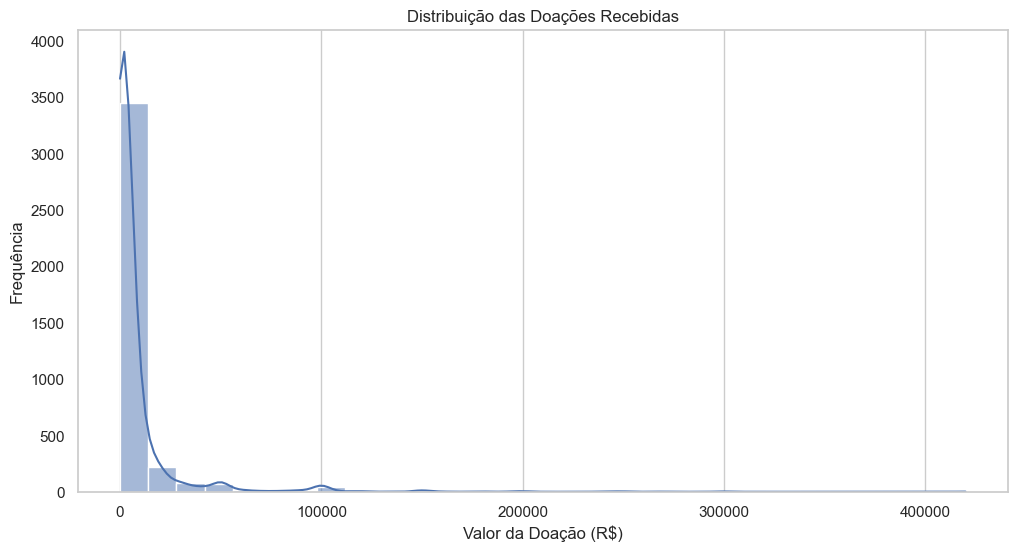

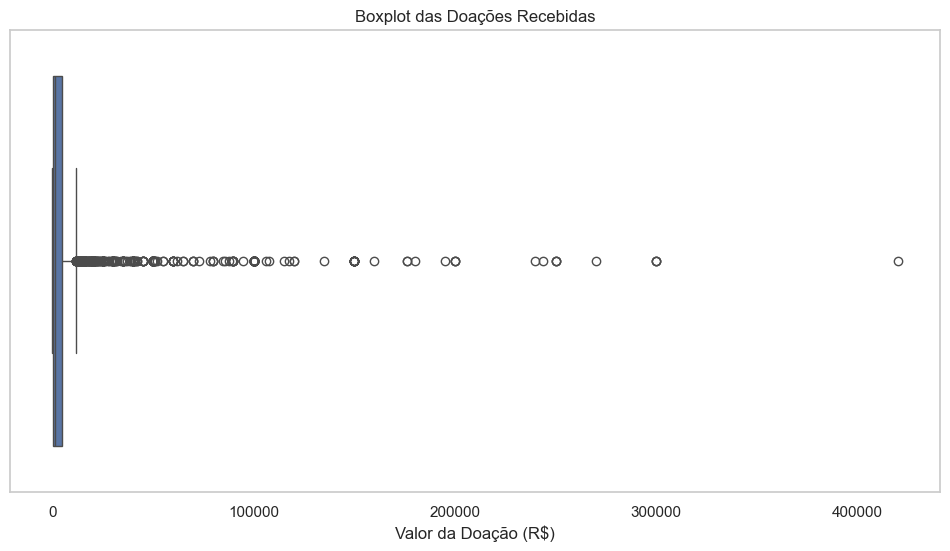

Total de outliers encontrados: 504
Outliers encontrados:
       VR_RECEITA
15      20000.00
16      85000.00
17      50000.00
18      14669.74
28      15000.00
...          ...
3918    20000.00
3941    50000.00
3943    15000.00
3959    40000.00
3960    50000.00

[504 rows x 1 columns]


In [130]:
import seaborn as sns
doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')


plt.figure(figsize=(12, 6))
sns.histplot(doacoes_unicas['VR_RECEITA'], bins=30, kde=True)  # Incluindo a densidade kernel para suavização
plt.title('Distribuição das Doações Recebidas')
plt.xlabel('Valor da Doação (R$)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=doadores_infratores['VR_RECEITA'])
plt.title('Boxplot das Doações Recebidas')
plt.xlabel('Valor da Doação (R$)')
plt.grid(axis='x')
plt.show()

q1 = doadores_infratores['VR_RECEITA'].quantile(0.25)
q3 = doadores_infratores['VR_RECEITA'].quantile(0.75)
iqr = q3 - q1  # Intervalo interquartil

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = doadores_infratores[(doadores_infratores['VR_RECEITA'] < limite_inferior) | (doadores_infratores['VR_RECEITA'] > limite_superior)]

print(f"Total de outliers encontrados: {len(outliers)}")
print("Outliers encontrados:\n", outliers[['VR_RECEITA']])


In [29]:
import pandas as pd

doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')
doacoes_por_cidade = doacoes_unicas.groupby(['NM_UE', 'SG_UF'])['VR_RECEITA'].sum().reset_index()
doacoes_por_cidade.rename(columns={'VR_RECEITA': 'TOTAL_DOACOES'}, inplace=True)
cidade_maior_doacao = doacoes_por_cidade.loc[doacoes_por_cidade['TOTAL_DOACOES'].idxmax()]

print(f"A cidade com o maior valor de doações de infratores é: {cidade_maior_doacao['NM_UE']}, com um total de doações de R$ {cidade_maior_doacao['TOTAL_DOACOES']:,.2f}.")
doacoes_por_cidade.sort_values(by='TOTAL_DOACOES', ascending=False).head(20)

A cidade com o maior valor de doações de infratores é: RONDONÓPOLIS, com um total de doações de R$ 1,133,635.00.


,NM_UE,SG_UF,TOTAL_DOACOES
906,RONDONÓPOLIS,MT,1133635.00
317,CÁCERES,MT,921681.36
859,PRIMAVERA DO LESTE,MT,848000.00
979,SORRISO,MT,758434.00
1035,SÃO PAULO,SP,694718.25
87,ARIQUEMES,RO,657600.88
902,RIO VERDE,GO,648922.00
596,LUZIÂNIA,GO,615650.00
195,CAMPO GRANDE,MS,592200.00
750,PARACATU,MG,549490.00


In [30]:
#AQUI PODEMOS CONSULTAR QUANTIDADE DE DOAÇÕES POR CANDIDATO
#BOM PARA CONSUTARMOS CASOS INDIVIDUAIS COMO O DO ADEMIR, MAIOR RECEBEDOR DE DOAÇÕES VINDAS DE INFRATORES


candidato = doadores_infratores[doadores_infratores['NM_CANDIDATO'] == 'ADEMIR ORTIZ DE GOES']
candidato[['NM_CANDIDATO', 'NOME_INFRATOR','NUM_INFRACOES', 'VR_RECEITA', 'NM_UE', 'SG_UF', 'SQ_RECEITA']]

,NM_CANDIDATO,NOME_INFRATOR,NUM_INFRACOES,VR_RECEITA,NM_UE,SG_UF,SQ_RECEITA
382,ADEMIR ORTIZ DE GOES,ADEMIR ORTIZ GOES,1,26000.0,PRIMAVERA DO LESTE,MT,39364879
383,ADEMIR ORTIZ DE GOES,ADEMIR ORTIZ GOES,1,1000.0,PRIMAVERA DO LESTE,MT,39364878
478,ADEMIR ORTIZ DE GOES,NELSO MARCON,2,50000.0,PRIMAVERA DO LESTE,MT,39364896
479,ADEMIR ORTIZ DE GOES,NELSO MARCON,2,150000.0,PRIMAVERA DO LESTE,MT,39364891
782,ADEMIR ORTIZ DE GOES,ADRIANO LUIZ BARCHET,1,6000.0,PRIMAVERA DO LESTE,MT,39364895
963,ADEMIR ORTIZ DE GOES,JOS OTAVIANO RIBEIRO NARDES,2,40000.0,PRIMAVERA DO LESTE,MT,39364887
1259,ADEMIR ORTIZ DE GOES,MARCOS ANTONIO VIMERCATI,1,150000.0,PRIMAVERA DO LESTE,MT,39364898
1518,ADEMIR ORTIZ DE GOES,PETER FERTER,3,50000.0,PRIMAVERA DO LESTE,MT,39364890
1551,ADEMIR ORTIZ DE GOES,CARLOS ALBERTO POLATO,1,15000.0,PRIMAVERA DO LESTE,MT,39364901
1552,ADEMIR ORTIZ DE GOES,CARLOS ALBERTO POLATO,1,100000.0,PRIMAVERA DO LESTE,MT,39364881


In [31]:
#AQUI PODEMOS CONSULTAR QUANTIDADE DE DOAÇÕES POR CANDIDATO
#BOM PARA CONSUTARMOS CASOS INDIVIDUAIS COMO O DO ADEMIR, MAIOR RECEBEDOR DE DOAÇÕES VINDAS DE INFRATORES

doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')

candidato = doacoes_unicas[doacoes_unicas['NM_CANDIDATO'] == 'PABLO HENRIQUE COSTA MARCAL']
candidato[['NM_CANDIDATO', 'NOME_INFRATOR','NUM_INFRACOES', 'VR_RECEITA', 'NM_UE', 'SG_UF', 'SQ_RECEITA', 'MUNICIPIO', 'UF']]



,NM_CANDIDATO,NOME_INFRATOR,NUM_INFRACOES,VR_RECEITA,NM_UE,SG_UF,SQ_RECEITA,MUNICIPIO,UF
14,PABLO HENRIQUE COSTA MARCAL,BRUNO TOGNON DA SILVEIRA,1,100.00,SÃO PAULO,SP,40975887,[MIGUELOPOLIS],[SP]
23,PABLO HENRIQUE COSTA MARCAL,LUIZ ERNESTO SOUZA LEAL,2,1000.00,SÃO PAULO,SP,40973359,"[SANTAREM, SANTAREM]","[PA, PA]"
105,PABLO HENRIQUE COSTA MARCAL,CARLOS ROBERTO LIMA PARENTE,1,20.00,SÃO PAULO,SP,41038785,[TRAIRI],[CE]
108,PABLO HENRIQUE COSTA MARCAL,HUMBERTO JOSE DE CASTRO,1,5.00,SÃO PAULO,SP,41057536,[FORMIGA],[MG]
164,PABLO HENRIQUE COSTA MARCAL,INACIO RODRIGUES DO NASCIMENTO,2,50.00,SÃO PAULO,SP,41039126,"[ITAPACI, ITAPACI]","[GO, GO]"
...,...,...,...,...,...,...,...,...,...
3955,PABLO HENRIQUE COSTA MARCAL,GERALDO MARCIO VIEIRA,1,33.28,SÃO PAULO,SP,41040065,[PAPAGAIOS],[MG]
3956,PABLO HENRIQUE COSTA MARCAL,PAULO YUKIHIRO GONDO,2,200.00,SÃO PAULO,SP,41024267,"[NOVA VICOSA, NOVA VICOSA]","[BA, BA]"
3958,PABLO HENRIQUE COSTA MARCAL,HUGO EDUARDO MENEZES CARVALHO,1,100.00,SÃO PAULO,SP,41046658,[JATAI],[GO]
3962,PABLO HENRIQUE COSTA MARCAL,MARCELO BEZERRA GUERREIRO,2,10.00,SÃO PAULO,SP,41048742,"[NATAL, NISIA FLORESTA]","[RN, RN]"


In [32]:
doacoes_unicas[doacoes_unicas['NM_CANDIDATO'] == 'ADRIANE BARBOSA NOGUEIRA LOPES'] 

,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,...,NUM_INFRACOES,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS
192,MS,90514,CAMPO GRANDE,56579884000135,Prefeito,120002167893,11,ADRIANE BARBOSA NOGUEIRA LOPES,-4,-4,...,1,ALMIR DALPASQUALE,100000.0,[COXIM],[MS],[2007],[None],"[Destruir (danificar, desmatar) florestas ou d...",[N],5
194,MS,90514,CAMPO GRANDE,56579884000135,Prefeito,120002167893,11,ADRIANE BARBOSA NOGUEIRA LOPES,-4,-4,...,1,ALMIR DALPASQUALE,100000.0,[COXIM],[MS],[2007],[None],"[Destruir (danificar, desmatar) florestas ou d...",[N],5


In [33]:
infrator = doadores_infratores[doadores_infratores['NOME_INFRATOR'] == 'LINDOMAR RESENDE SOARES']
infrator[['NM_CANDIDATO', 'DS_CARGO', 'NOME_INFRATOR','NUM_INFRACOES', 'VR_RECEITA', 'NM_UE', 'SG_UF', 'SQ_RECEITA']]

,NM_CANDIDATO,DS_CARGO,NOME_INFRATOR,NUM_INFRACOES,VR_RECEITA,NM_UE,SG_UF,SQ_RECEITA
1882,JOSE WILSON TEIXEIRA MOURAO,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38951335
1883,ARISTOTELES KAWA,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,39222085
1884,EDINALDO DOS SANTOS LIMA,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38949807
1885,DENISE ANTONIA GONCALVES BRITO VIEIRA,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38930723
1886,MAGNEIDE DE CARVALHO SILVA,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38923122
1887,JAGSON DE SOUSA VASCONCELOS,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38931189
1888,LUCAS ULIANA CARNEIRO DE ALMEIDA,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38926985
1889,KELLY CRISTINA DESTRO,Prefeito,LINDOMAR RESENDE SOARES,4,55000.0,ULIANÓPOLIS,PA,38959815
1890,LUIS CARLOS LIRA DOS SANTOS,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38924801
1891,ZACARIAS BARROS PIEDADE JUNIOR,Vereador,LINDOMAR RESENDE SOARES,4,900.0,ULIANÓPOLIS,PA,38923556


In [34]:
paulo = doadores_infratores[doadores_infratores['NM_CANDIDATO'] == 'PAULO JOSÉ CORREIA']
paulo[['NOME_INFRATOR', 'VR_RECEITA']]

,NOME_INFRATOR,VR_RECEITA
474,CARLOS ERNESTO AUGUSTIN,100000.0
475,CARLOS ERNESTO AUGUSTIN,200000.0
476,CARLOS ERNESTO AUGUSTIN,420000.0


In [35]:
infrator_consulta = doadores_infratores[doadores_infratores['NOME_INFRATOR'] == 'LUIZ ERNESTO SOUZA LEAL']
infrator_consulta

,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,...,NUM_INFRACOES,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS
23,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,2,LUIZ ERNESTO SOUZA LEAL,709.0,"[SANTAREM, SANTAREM]","[PA, PA]","[1998, 1998]","[None, None]","[Rasurar, preencher incorretamente, extraviar,...","[N, N]",2
2760,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,2,LUIZ ERNESTO SOUZA LEAL,709.0,"[SANTAREM, SANTAREM]","[PA, PA]","[1998, 1998]","[None, None]","[Rasurar, preencher incorretamente, extraviar,...","[N, N]",2


In [36]:
#doadores_infratores.to_csv('doadores_infratores.csv')

In [37]:
# Filtrando as doações feitas para o candidato específico
marcal = doadores_infratores[doadores_infratores['NM_CANDIDATO'] == 'PABLO HENRIQUE COSTA MARCAL']
marcal


,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,...,NUM_INFRACOES,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS
14,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,1,BRUNO TOGNON DA SILVEIRA,2000.00,[MIGUELOPOLIS],[SP],[2021],[Cerrado],[Introduzir (guarda) espécime animal silvestre...,[N],1
23,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,2,LUIZ ERNESTO SOUZA LEAL,709.00,"[SANTAREM, SANTAREM]","[PA, PA]","[1998, 1998]","[None, None]","[Rasurar, preencher incorretamente, extraviar,...","[N, N]",2
105,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,1,CARLOS ROBERTO LIMA PARENTE,10000.00,[TRAIRI],[CE],[2009],[None],[Promover construção de um imóvel que ocupa um...,[N],1
108,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,1,HUMBERTO JOSE DE CASTRO,1500.00,[FORMIGA],[MG],[2001],[None],[DEGRADACAO EM AREA AMBIENTAL SEM LICENCA DO I...,[N],1
164,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,2,INACIO RODRIGUES DO NASCIMENTO,3500.00,"[ITAPACI, ITAPACI]","[GO, GO]","[2004, 2004]","[None, None]",[DESMATAR 20 HECTARES DE CERRADO ABERTO BAIXO ...,"[N, N]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,1,GERALDO MARCIO VIEIRA,500.00,[PAPAGAIOS],[MG],[2000],[None],"[POR EXERCER ATIVIDADE POLUIDORA, SEM AUTORIZA...",[N],2
3956,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,2,PAULO YUKIHIRO GONDO,500.01,"[NOVA VICOSA, NOVA VICOSA]","[BA, BA]","[1997, 1997]","[None, None]","[Desmatar, causar a morte, suprimir ou explora...","[N, N]",1
3958,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,1,HUGO EDUARDO MENEZES CARVALHO,1500.00,[JATAI],[GO],[2000],[None],"[EXTRACAO DE MINERIO '' PEDRA '', EM AREA DE P...",[N],1
3962,SP,71072,SÃO PAULO,56336422000197,Prefeito,250001978066,28,PABLO HENRIQUE COSTA MARCAL,-4,-4,...,2,MARCELO BEZERRA GUERREIRO,2800.00,"[NATAL, NISIA FLORESTA]","[RN, RN]","[1998, 2016]","[None, Costeiro e Marinho]",[Por transportar Produtos Florestais sem Cober...,"[N, N]",3


In [110]:
torrinho = doadores_infratores[doadores_infratores['NM_CANDIDATO'] == 'JOAO CLEBER DE SOUZA TORRES']
torrinho


,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,...,NUM_INFRACOES,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS
2847,PA,5452,SÃO FÉLIX DO XINGU,56757562000139,Prefeito,140002277454,15,JOAO CLEBER DE SOUZA TORRES,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SEM AUT. DO ORGAO COMPETENTE., ARMAZENAMENTO DE 10,88M3 DE MAD. EM MANCOS DE AROEIRA,SEM COB. DE ATPF.]","[N, N]",56
2848,PA,5452,SÃO FÉLIX DO XINGU,56757562000139,Prefeito,140002277454,15,JOAO CLEBER DE SOUZA TORRES,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SEM AUT. DO ORGAO COMPETENTE., ARMAZENAMENTO DE 10,88M3 DE MAD. EM MANCOS DE AROEIRA,SEM COB. DE ATPF.]","[N, N]",56
2849,PA,5452,SÃO FÉLIX DO XINGU,56757562000139,Prefeito,140002277454,15,JOAO CLEBER DE SOUZA TORRES,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SEM AUT. DO ORGAO COMPETENTE., ARMAZENAMENTO DE 10,88M3 DE MAD. EM MANCOS DE AROEIRA,SEM COB. DE ATPF.]","[N, N]",56
2850,PA,5452,SÃO FÉLIX DO XINGU,56757562000139,Prefeito,140002277454,15,JOAO CLEBER DE SOUZA TORRES,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SEM AUT. DO ORGAO COMPETENTE., ARMAZENAMENTO DE 10,88M3 DE MAD. EM MANCOS DE AROEIRA,SEM COB. DE ATPF.]","[N, N]",56
3323,PA,5452,SÃO FÉLIX DO XINGU,56757562000139,Prefeito,140002277454,15,JOAO CLEBER DE SOUZA TORRES,-4,-4,...,7,JOO CLEBER DE SOUZA TORRES,9277634.5,"[SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU]","[PA, PA, PA, PA, PA, PA, PA]","[1994, 2011, 2011, 2014, 2023, 2023, 2023]","[None, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia]","[POR TER SERRADO O VOLUME DE 50.000 M³ DE MADEIRA EM TORA DA ESPECIE MOGNO, SEM A DEVIDA COBERTURA DA ATPF NA SERRARIA E MADEIREIRA PE DE CEDRO COM UM E REGISTRONO IBAMA, CUJO O VOLUME RESALTANTE E DE 28.000 M³ SERRADO., DESTRUIR 17,5149 HA DE FLORESTA CONSIDERADA DE ESPECIAL PRESERVAÇÃO (AMAZÔNIA LEGAL), SEM AUTORIZAÇÃO DA AUTORIDADE COMPETENTE., UTILIZAR MOTOSSERRA SEM LICENÇA, REGISTRO DA AUTORIDADE AMBIENTAL COMPETENTE. OBS: MOTOSSERRA STHIL Nº DE SÉRIE 350631085 (OP. TORNADO), Destruir 1326,64ha de floresta na Amazônia Legal, objeto de especial preservação, sem autorização do orgão ambiental competente., Impedir a regeneração natural em uma área de 86,25 Hectares, embargada pó TEI NR. 676373 - E, constante no Processo 02047.000843/2015-90., Descumprir embargo em uma área de 86,25 Hectares, com a formação de pastagens, inclusive com a presença de bovinos. Termo de Embargo Nr 676373-E, Processo 02047.000843/2015-90., Destruir 338,31 hectares de mata nativa, objeto de especial preservação (Amazônia Legal), conforme descrito no Polígono 12 do Centróide: 7°1'51,56""S 52°09'1,716""W (anexo), sem autorização ou licença da autoridade ambiental competente.]","[S, N, N, N, N, N, N]",2
3324,PA,5452,SÃO FÉLIX DO XINGU,56757562000139,Prefeito,140002277454,15,JOAO CLEBER DE SOUZA TORRES,-4,-4,...,7,JOO CLEBER DE SOUZA TORRES,9277634.5,"[SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU]","[PA, PA, PA, PA, PA, PA, PA]","[1994, 2011, 2011, 2014, 2023, 2023, 2023]","[None, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia]","[POR TER SERRADO O VOLUME DE 50.000 M³ DE MADEIRA EM TORA DA ESPECIE MOGNO, SEM A DEVIDA COBERTURA DA ATPF NA SERRARIA E MADEIREIRA PE DE CEDRO COM UM E REGISTRONO IBAMA, CUJO 

In [112]:
#VISUALIZANDO DADOS DOS INFVRATORES POR CANDIDATOS


df_infratores_unicos = torrinho.groupby('NOME_INFRATOR').agg({
    'SOMA_INFRACAO': 'sum',            
    'MUNICIPIO': 'first',              
    'UF': 'first',                     
    'ANO_INFRACAO': 'first',           
    'DS_BIOMAS_ATINGIDOS': 'first',    
    'DES_AUTO_INFRACAO': 'first',      
    'SIT_CANCELADO': 'first',        
    'DOACOES_FEITAS': 'sum',
    'VR_RECEITA': 'sum'           
}).reset_index()

# Exibindo o DataFrame resultante
df_infratores_unicos


,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS,VR_RECEITA
0,JOO CLEBER DE SOUZA TORRES,18555269.0,"[SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU]","[PA, PA, PA, PA, PA, PA, PA]","[1994, 2011, 2011, 2014, 2023, 2023, 2023]","[None, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia]","[POR TER SERRADO O VOLUME DE 50.000 M³ DE MADEIRA EM TORA DA ESPECIE MOGNO, SEM A DEVIDA COBERTURA DA ATPF NA SERRARIA E MADEIREIRA PE DE CEDRO COM UM E REGISTRONO IBAMA, CUJO O VOLUME RESALTANTE E DE 28.000 M³ SERRADO., DESTRUIR 17,5149 HA DE FLORESTA CONSIDERADA DE ESPECIAL PRESERVAÇÃO (AMAZÔNIA LEGAL), SEM AUTORIZAÇÃO DA AUTORIDADE COMPETENTE., UTILIZAR MOTOSSERRA SEM LICENÇA, REGISTRO DA AUTORIDADE AMBIENTAL COMPETENTE. OBS: MOTOSSERRA STHIL Nº DE SÉRIE 350631085 (OP. TORNADO), Destruir 1326,64ha de floresta na Amazônia Legal, objeto de especial preservação, sem autorização do orgão ambiental competente., Impedir a regeneração natural em uma área de 86,25 Hectares, embargada pó TEI NR. 676373 - E, constante no Processo 02047.000843/2015-90., Descumprir embargo em uma área de 86,25 Hectares, com a formação de pastagens, inclusive com a presença de bovinos. Termo de Embargo Nr 676373-E, Processo 02047.000843/2015-90., Destruir 338,31 hectares de mata nativa, objeto de especial preservação (Amazônia Legal), conforme descrito no Polígono 12 do Centróide: 7°1'51,56""S 52°09'1,716""W (anexo), sem autorização ou licença da autoridade ambiental competente.]","[S, N, N, N, N, N, N]",4,178500.0
1,JOS RICARDO REZEK,188928.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SEM AUT. DO ORGAO COMPETENTE., ARMAZENAMENTO DE 10,88M3 DE MAD. EM MANCOS DE AROEIRA,SEM COB. DE ATPF.]","[N, N]",224,300000.0


In [113]:
#VISUALIZANDO DADOS DOS INFVRATORES POR CANDIDATOS


df_infratores_unicos = torrinho.groupby('NOME_INFRATOR').agg({
    'SOMA_INFRACAO': 'sum',            # Soma das infrações
    'MUNICIPIO': 'first',              # Primeiro município listado (ou pode ajustar dependendo do contexto)
    'UF': 'first',                     # Primeira UF listada
    'ANO_INFRACAO': 'first',           # Primeiro ano de infração listado
    'DS_BIOMAS_ATINGIDOS': 'first',    # Biomas atingidos
    'DES_AUTO_INFRACAO': 'first',      # Descrição da infração
    'SIT_CANCELADO': 'first',          # Situação cancelada
    'DOACOES_FEITAS': 'sum'            # Soma das doações feitas
}).reset_index()

# Exibindo o DataFrame resultante
df_infratores_unicos


,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS
0,JOO CLEBER DE SOUZA TORRES,18555269.0,"[SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU, SAO FELIX DO XINGU]","[PA, PA, PA, PA, PA, PA, PA]","[1994, 2011, 2011, 2014, 2023, 2023, 2023]","[None, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia, Amazonia]","[POR TER SERRADO O VOLUME DE 50.000 M³ DE MADEIRA EM TORA DA ESPECIE MOGNO, SEM A DEVIDA COBERTURA DA ATPF NA SERRARIA E MADEIREIRA PE DE CEDRO COM UM E REGISTRONO IBAMA, CUJO O VOLUME RESALTANTE E DE 28.000 M³ SERRADO., DESTRUIR 17,5149 HA DE FLORESTA CONSIDERADA DE ESPECIAL PRESERVAÇÃO (AMAZÔNIA LEGAL), SEM AUTORIZAÇÃO DA AUTORIDADE COMPETENTE., UTILIZAR MOTOSSERRA SEM LICENÇA, REGISTRO DA AUTORIDADE AMBIENTAL COMPETENTE. OBS: MOTOSSERRA STHIL Nº DE SÉRIE 350631085 (OP. TORNADO), Destruir 1326,64ha de floresta na Amazônia Legal, objeto de especial preservação, sem autorização do orgão ambiental competente., Impedir a regeneração natural em uma área de 86,25 Hectares, embargada pó TEI NR. 676373 - E, constante no Processo 02047.000843/2015-90., Descumprir embargo em uma área de 86,25 Hectares, com a formação de pastagens, inclusive com a presença de bovinos. Termo de Embargo Nr 676373-E, Processo 02047.000843/2015-90., Destruir 338,31 hectares de mata nativa, objeto de especial preservação (Amazônia Legal), conforme descrito no Polígono 12 do Centróide: 7°1'51,56""S 52°09'1,716""W (anexo), sem autorização ou licença da autoridade ambiental competente.]","[S, N, N, N, N, N, N]",4
1,JOS RICARDO REZEK,188928.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SEM AUT. DO ORGAO COMPETENTE., ARMAZENAMENTO DE 10,88M3 DE MAD. EM MANCOS DE AROEIRA,SEM COB. DE ATPF.]","[N, N]",224


In [41]:
rezek = doadores_infratores[doadores_infratores['CPF_CNPJ_INFRATOR'] == '41006151834']
rezek

,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,...,NUM_INFRACOES,NOME_INFRATOR,SOMA_INFRACAO,MUNICIPIO,UF,ANO_INFRACAO,DS_BIOMAS_ATINGIDOS,DES_AUTO_INFRACAO,SIT_CANCELADO,DOACOES_FEITAS
983,SP,64777,GUARULHOS,56372707000183,Vereador,250001996610,33300,JOSE WANDERLEY KOPCZYNSKI BARBOSA PEDROSO,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1790,MT,98930,SORRISO,56410288000127,Prefeito,110002016616,15,LEANDRO CARLOS DAMIANI,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1791,SP,62138,BARUERI,56696026000170,Prefeito,250002232165,15,FABIO LUIZ DA SILVA RHORMENS,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1792,SP,62138,BARUERI,56696026000170,Prefeito,250002232165,15,FABIO LUIZ DA SILVA RHORMENS,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1793,SP,65455,ITAPECERICA DA SERRA,56275821000195,Vereador,250001947310,44300,NERISVALDO SOARES DA SILVA,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1794,SP,64696,GUARATINGUETÁ,56571262000160,Prefeito,250002158234,55,ANTONIO GILBERTO FILIPPO FERNANDES JUNIOR,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1795,SP,62715,CAÇAPAVA,56516653000182,Vereador,250002032760,44123,CATIANE SOUZA FONSECA SANTOS,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1796,SP,70998,SÃO JOSÉ DOS CAMPOS,56535806000139,Vereador,250002127271,10999,JACKSON HENRIQUE DE SOUZA,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1797,SP,63339,CESÁRIO LANGE,56446730000175,Prefeito,250002028874,10,RAMIRO DE CAMPOS,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56
1798,SP,62391,BOITUVA,56245358000139,Prefeito,250001932170,55,EDSON JOSE MARCUSSO,-4,-4,...,2,JOS RICARDO REZEK,47232.0,"[DOVERLANDIA, DOVERLANDIA]","[GO, GO]","[2000, 2000]","[None, None]","[DESMATAMENTO DE 26,62HA. DE CERRADO GROSSO,SE...","[N, N]",56


In [114]:
print(f'doações totais do {rezek} : {rezek["VR_RECEITA"].sum()}')


doações totais do      SG_UF  SG_UE                  NM_UE  NR_CNPJ_PRESTADOR_CONTA  DS_CARGO  \
983     SP  64777              GUARULHOS           56372707000183  Vereador   
1790    MT  98930                SORRISO           56410288000127  Prefeito   
1791    SP  62138                BARUERI           56696026000170  Prefeito   
1792    SP  62138                BARUERI           56696026000170  Prefeito   
1793    SP  65455   ITAPECERICA DA SERRA           56275821000195  Vereador   
1794    SP  64696          GUARATINGUETÁ           56571262000160  Prefeito   
1795    SP  62715               CAÇAPAVA           56516653000182  Vereador   
1796    SP  70998    SÃO JOSÉ DOS CAMPOS           56535806000139  Vereador   
1797    SP  63339          CESÁRIO LANGE           56446730000175  Prefeito   
1798    SP  62391                BOITUVA           56245358000139  Prefeito   
1799    SP  71072              SÃO PAULO           56193138000109  Vereador   
1800    SP  71072              SÃO

In [59]:
rezek.to_csv('rezek.csv')

In [67]:
rezek[['VR_RECEITA', 'NM_CANDIDATO', 'NM_UE', 'SG_UF', 'DS_CARGO']]

,VR_RECEITA,NM_CANDIDATO,NM_UE,SG_UF,DS_CARGO
960,90000.0,JOSE WANDERLEY KOPCZYNSKI BARBOSA PEDROSO,GUARULHOS,SP,Vereador
1764,100000.0,LEANDRO CARLOS DAMIANI,SORRISO,MT,Prefeito
1765,100000.0,FABIO LUIZ DA SILVA RHORMENS,BARUERI,SP,Prefeito
1766,150000.0,FABIO LUIZ DA SILVA RHORMENS,BARUERI,SP,Prefeito
1767,80000.0,NERISVALDO SOARES DA SILVA,ITAPECERICA DA SERRA,SP,Vereador
1768,15000.0,ANTONIO GILBERTO FILIPPO FERNANDES JUNIOR,GUARATINGUETÁ,SP,Prefeito
1769,30000.0,CATIANE SOUZA FONSECA SANTOS,CAÇAPAVA,SP,Vereador
1770,15000.0,JACKSON HENRIQUE DE SOUZA,SÃO JOSÉ DOS CAMPOS,SP,Vereador
1771,30000.0,RAMIRO DE CAMPOS,CESÁRIO LANGE,SP,Prefeito
1772,30000.0,EDSON JOSE MARCUSSO,BOITUVA,SP,Prefeito


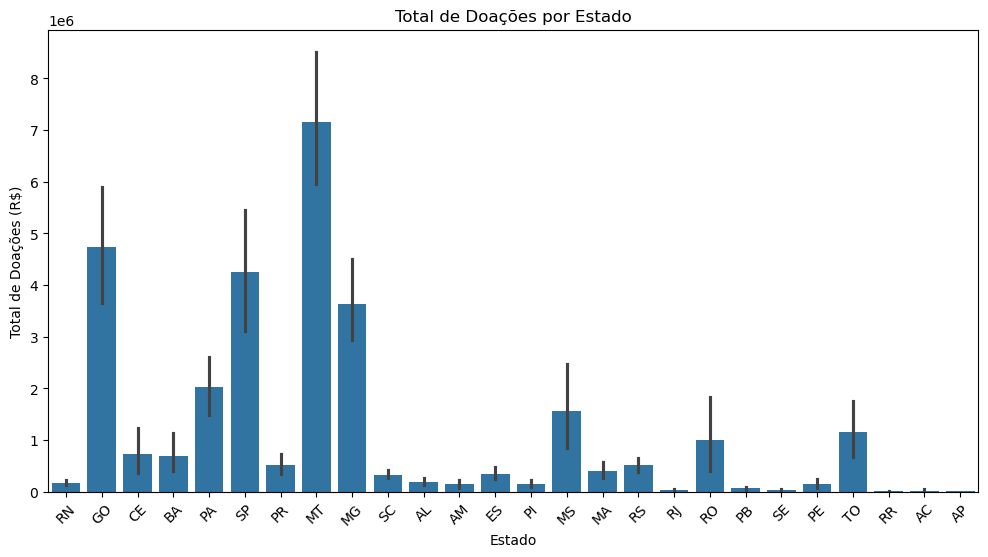

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')

plt.figure(figsize=(12, 6))
sns.barplot(data=doacoes_unicas, x='SG_UF', y='VR_RECEITA', estimator=sum)
plt.title('Total de Doações por Estado')
plt.ylabel('Total de Doações (R$)')
plt.xlabel('Estado')
plt.xticks(rotation=45)
plt.show()


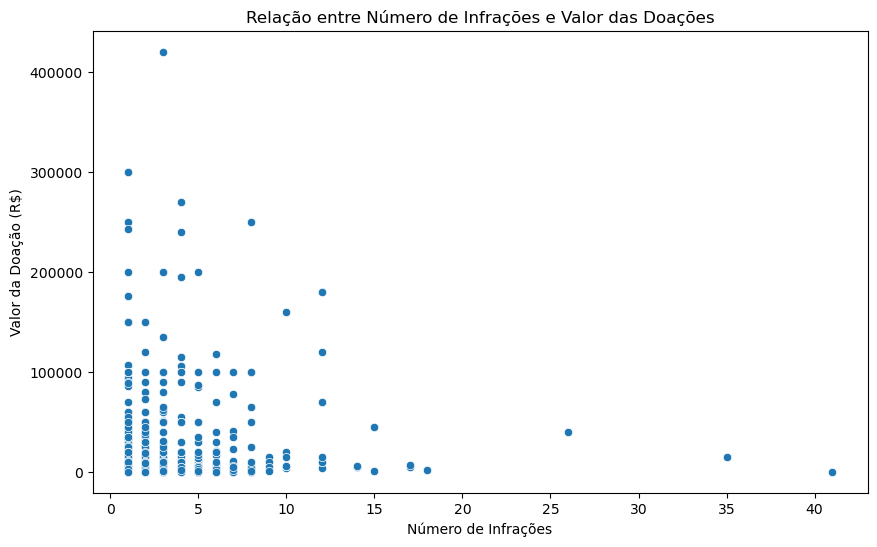

In [115]:
doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=doacoes_unicas, x='NUM_INFRACOES', y='VR_RECEITA')
plt.title('Relação entre Número de Infrações e Valor das Doações')
plt.xlabel('Número de Infrações')
plt.ylabel('Valor da Doação (R$)')
plt.show()


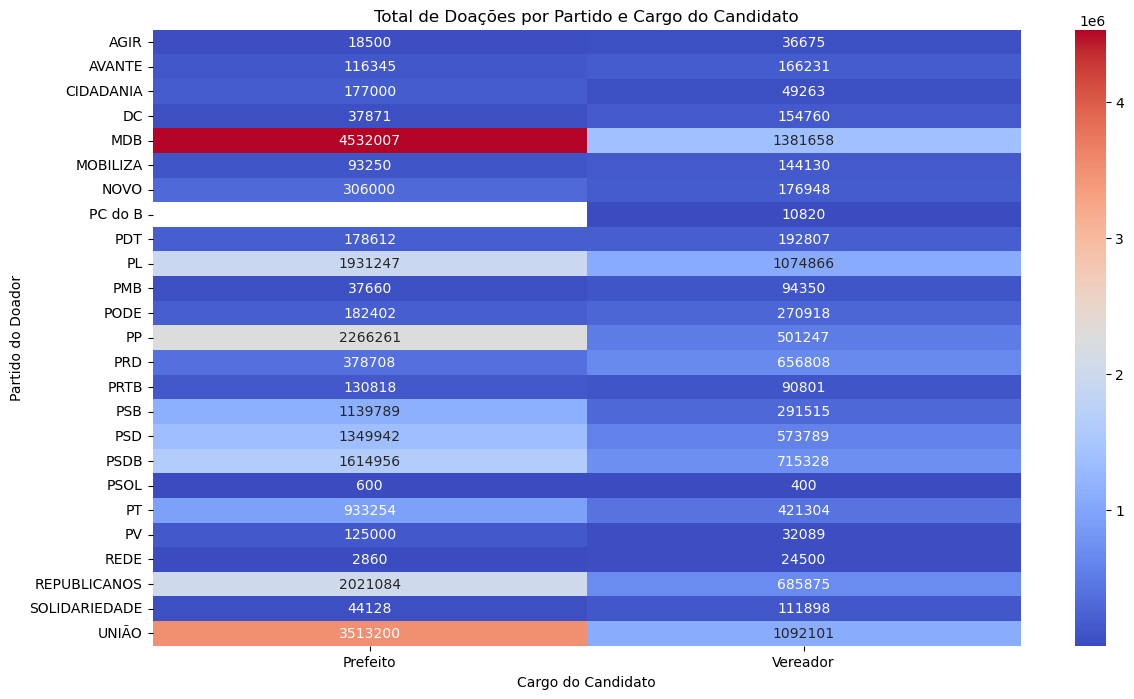

In [303]:


doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')

pivot_table = doacoes_unicas.pivot_table(values='VR_RECEITA', index='SG_PARTIDO', columns='DS_CARGO', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Total de Doações por Partido e Cargo do Candidato')
plt.xlabel('Cargo do Candidato')
plt.ylabel('Partido do Doador')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14960\2663777237.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




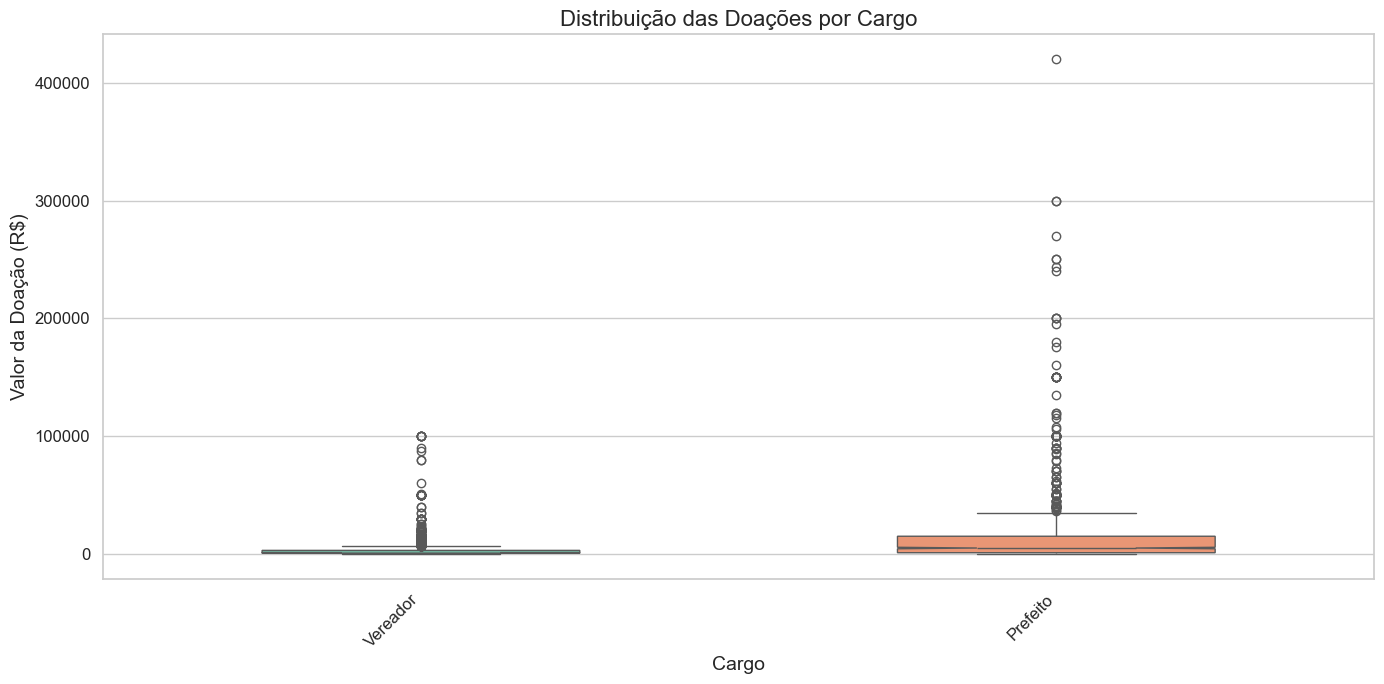

In [116]:

doacoes_unicas = doadores_infratores.drop_duplicates(subset='SQ_RECEITA')

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.boxplot(data=doacoes_unicas, x='DS_CARGO', y='VR_RECEITA', palette='Set2', notch=True, width=0.5)

plt.title('Distribuição das Doações por Cargo', fontsize=16)
plt.xlabel('Cargo', fontsize=14)
plt.ylabel('Valor da Doação (R$)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  
plt.show()


Correlação entre Doações e Infrações: 0.15


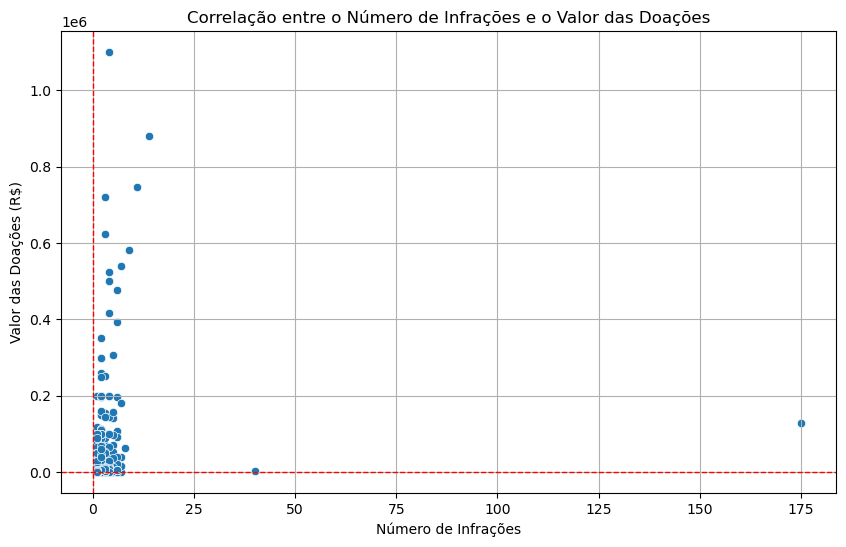

In [107]:
analise_infracoes = doadores_infratores.groupby('SQ_CANDIDATO').agg({
    'VR_RECEITA': 'sum',
    'NUM_INFRACOES': 'count'
}).reset_index()

correlation = analise_infracoes['VR_RECEITA'].corr(analise_infracoes['NUM_INFRACOES'])
print(f'Correlação entre Doações e Infrações: {correlation:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=analise_infracoes, x='NUM_INFRACOES', y='VR_RECEITA')
plt.title('Correlação entre o Número de Infrações e o Valor das Doações')
plt.xlabel('Número de Infrações')
plt.ylabel('Valor das Doações (R$)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.grid()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14960\3318990856.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




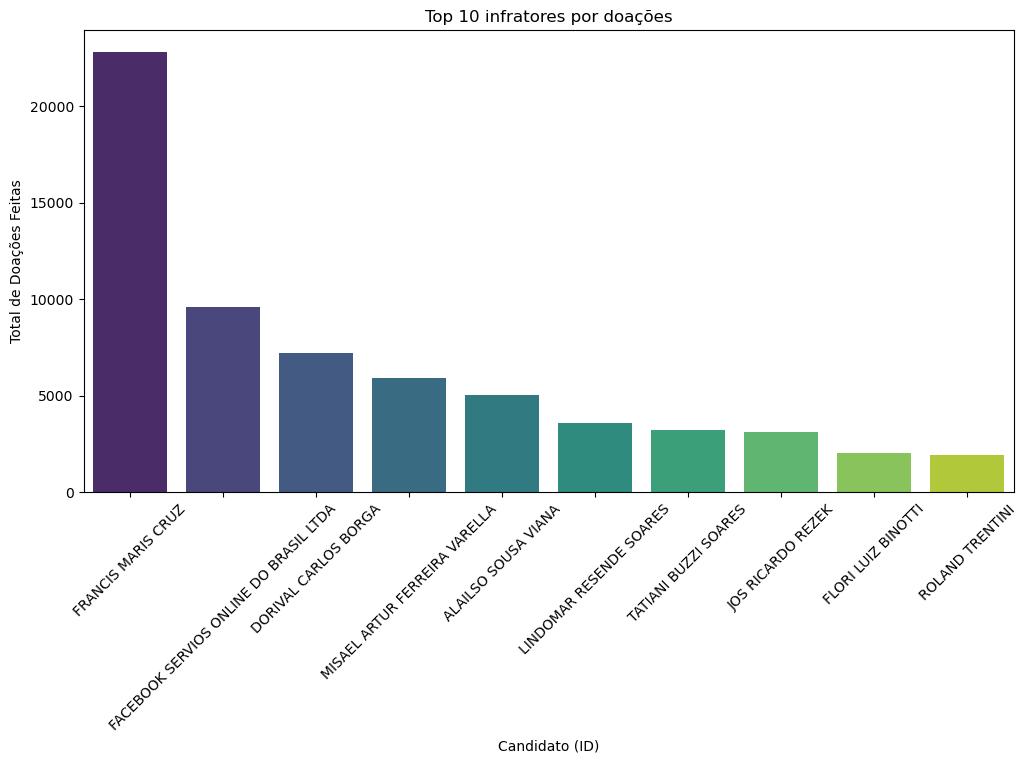

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14960\3318990856.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




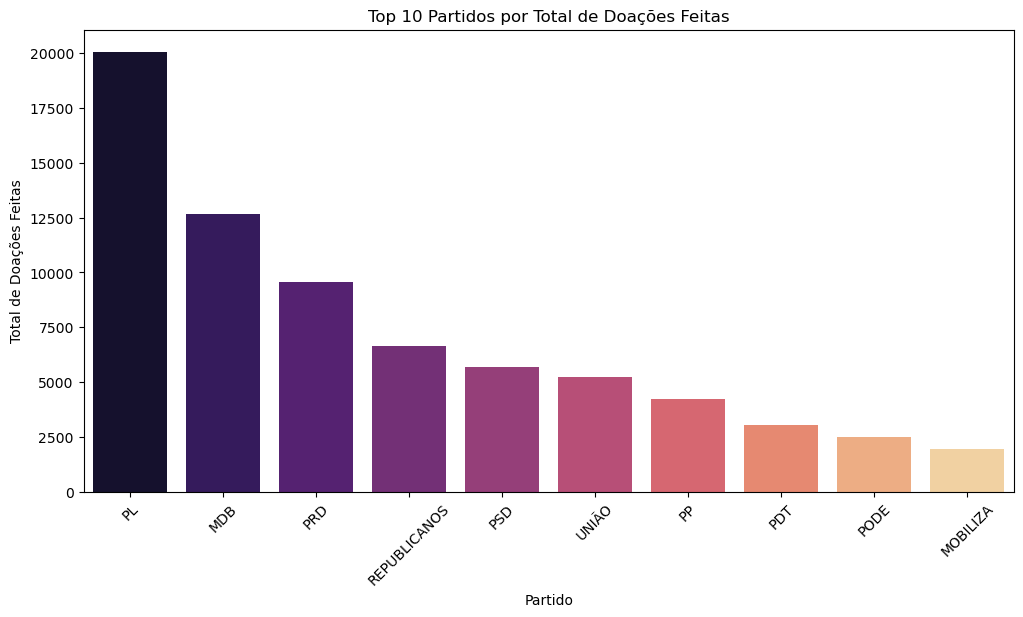

In [105]:

total_doacoes_candidato = doadores_infratores.groupby('NOME_INFRATOR').agg({
    'DOACOES_FEITAS': 'sum'
}).reset_index()

total_doacoes_partido = doadores_infratores.groupby('SG_PARTIDO').agg({
    'DOACOES_FEITAS': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_doacoes_candidato.sort_values('DOACOES_FEITAS', ascending=False).head(10),
             x='NOME_INFRATOR', y='DOACOES_FEITAS', palette='viridis')
plt.title('Top 10 infratores por doações')
plt.xlabel('Candidato (ID)')
plt.ylabel('Total de Doações Feitas')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_doacoes_partido.sort_values('DOACOES_FEITAS', ascending=False).head(10),
             x='SG_PARTIDO', y='DOACOES_FEITAS', palette='magma')
plt.title('Top 10 Partidos por Total de Doações Feitas')
plt.xlabel('Partido')
plt.ylabel('Total de Doações Feitas')
plt.xticks(rotation=45)
plt.show()


In [315]:
pip install geopandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14960\1409057608.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




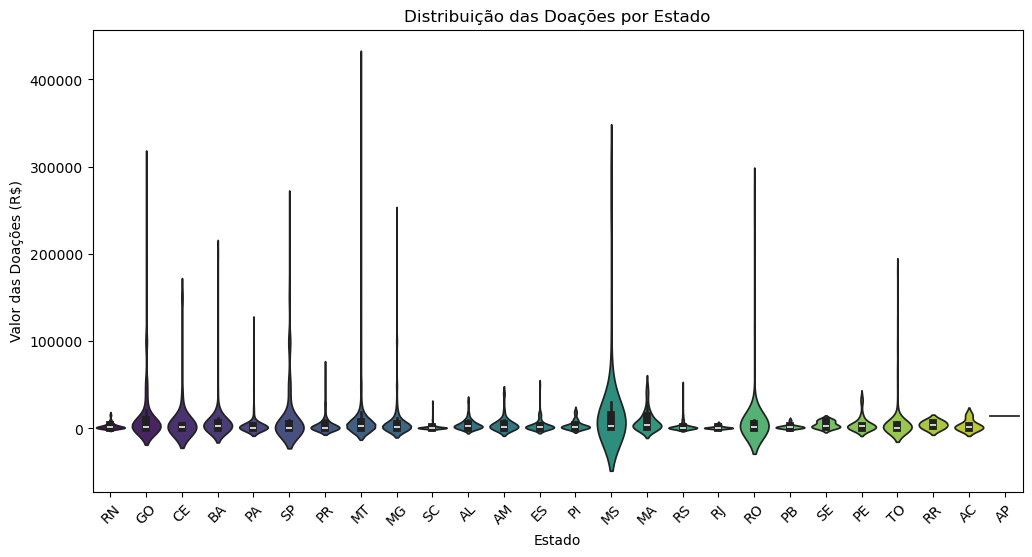

In [63]:
# Gráfico de violino
plt.figure(figsize=(12, 6))
sns.violinplot(data=doadores_infratores, x='SG_UF', y='VR_RECEITA', palette='viridis')
plt.title('Distribuição das Doações por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor das Doações (R$)')
plt.xticks(rotation=45)
plt.show()


In [108]:
# Tabela resumo
tabela_resumo = doacoes_por_estado.rename(columns={'VR_RECEITA': 'Total de Doações (R$)'})
tabela_resumo.sort_values(by='Total de Doações (R$)', ascending=False)


,SG_UF,Total de Doações (R$)
11,MT,7176062.66
24,SP,5089061.26
7,GO,4843795.60
9,MG,4095379.96
10,MS,2106507.79
12,PA,2075071.26
25,TO,1151137.49
5,CE,1033181.81
19,RO,1009873.99
4,BA,700793.37


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14960\320050515.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14960\320050515.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




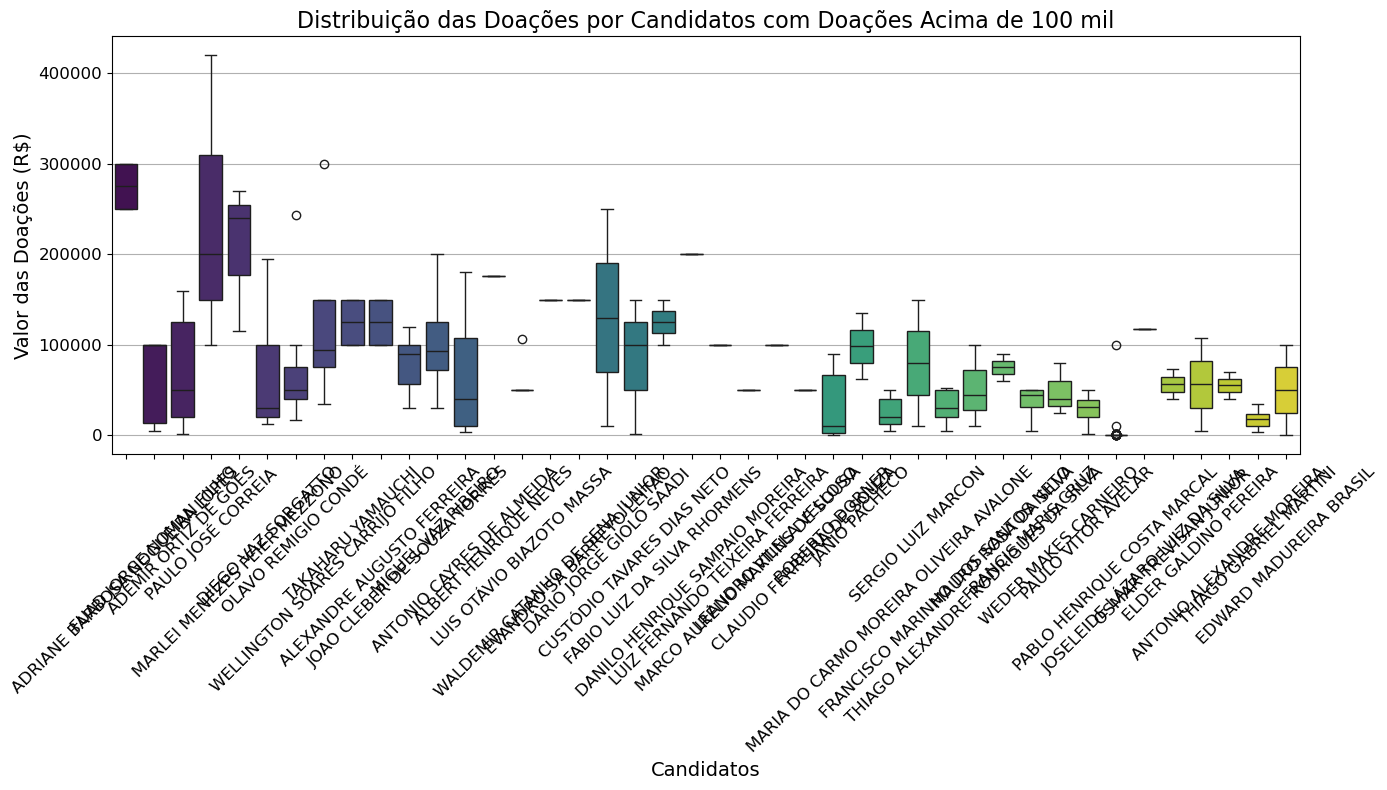

In [65]:
doacoes_por_candidato = doadores_infratores.groupby('NM_CANDIDATO')['VR_RECEITA'].sum().reset_index()

# Filtrar candidatos com doações significativas (por exemplo, > 10.000)
limite_doacao = 100000
candidatos_significativos = doacoes_por_candidato[doacoes_por_candidato['VR_RECEITA'] > limite_doacao]

# Filtrar o DataFrame original para incluir apenas os candidatos significativos
filtrado = doadores_infratores[doadores_infratores['NM_CANDIDATO'].isin(candidatos_significativos['NM_CANDIDATO'])]

# Ordenar os candidatos pela soma das doações
filtrado['NM_CANDIDATO'] = pd.Categorical(filtrado['NM_CANDIDATO'], 
                                                   categories=candidatos_significativos.sort_values('VR_RECEITA', ascending=False)['NM_CANDIDATO'],
                                                   ordered=True)

# Gráfico de boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtrado, x='NM_CANDIDATO', y='VR_RECEITA', palette='viridis')
plt.title('Distribuição das Doações por Candidatos com Doações Acima de 100 mil', fontsize=16)
plt.xlabel('Candidatos', fontsize=14)
plt.ylabel('Valor das Doações (R$)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para melhor apresentação
plt.show()


In [72]:
import pandas as pd
import plotly.graph_objects as go

# Supondo que doadores_infratores seja seu DataFrame
# Verifique se a coluna MUNICIPIO é uma lista e exploda, se necessário
if isinstance(doadores_infratores['UF'].iloc[0], list):
    explodido = doadores_infratores.explode('UF')
else:
    explodido = doadores_infratores

# Agrupar por MUNICIPIO e NM_UE, somando VR_RECEITA
agrupado = explodido.groupby(['UF', 'NM_UE'])['VR_RECEITA'].sum().reset_index()

# Filtrar para mostrar apenas onde MUNICIPIO e NM_UE são diferentes
agrupado_diferentes = agrupado[agrupado['UF'] != agrupado['NM_UE']]

# Contar destinos diferentes para cada MUNICIPIO
contagem_destinos = agrupado_diferentes.groupby('UF')['NM_UE'].nunique().reset_index()

# Filtrar para incluir apenas MUNICIPIOS com mais de 3 destinos diferentes
municipios_filtrados = contagem_destinos[contagem_destinos['NM_UE'] > 1]['UF']

# Filtrar o DataFrame original para incluir apenas os MUNICIPIOS filtrados
agrupado_final = agrupado_diferentes[agrupado_diferentes['UF'].isin(municipios_filtrados)]

# Obter as origens e destinos
origens = agrupado_final['UF']
destinos = agrupado_final['NM_UE']
valores = agrupado_final['VR_RECEITA']

# Criar um mapeamento de índices para as origens e destinos
todos_os_nodos = pd.Series(pd.concat([origens, destinos]).unique())

# Criar índices para as origens e destinos
origem_indices = [todos_os_nodos[todos_os_nodos == o].index[0] for o in origens]
destino_indices = [todos_os_nodos[todos_os_nodos == d].index[0] for d in destinos]

# Criar o gráfico Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=todos_os_nodos.values,
    ),
    link=dict(
        source=origem_indices,
        target=destino_indices,
        value=valores
    )
)])

fig.update_layout(title_text='Gráfico Sankey: MUNICIPIO como Origem e NM_UE como Destino', font_size=10)
fig.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17964\758333464.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=doadores_por_esfera, x='DS_ESFERA_PARTIDARIA_DOADOR', y='NM_DOADOR', palette='Blues')


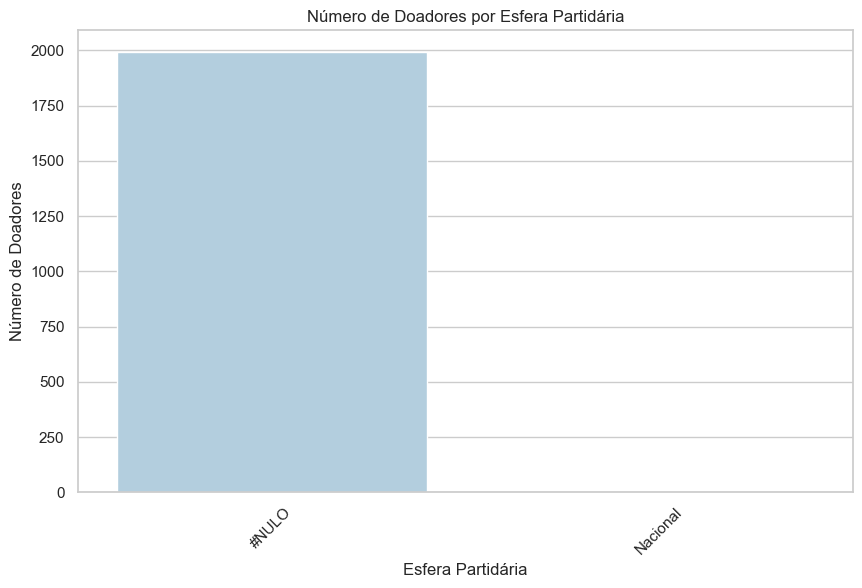

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17964\758333464.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=doacoes_por_tipo.sort_values('VR_RECEITA', ascending=False),


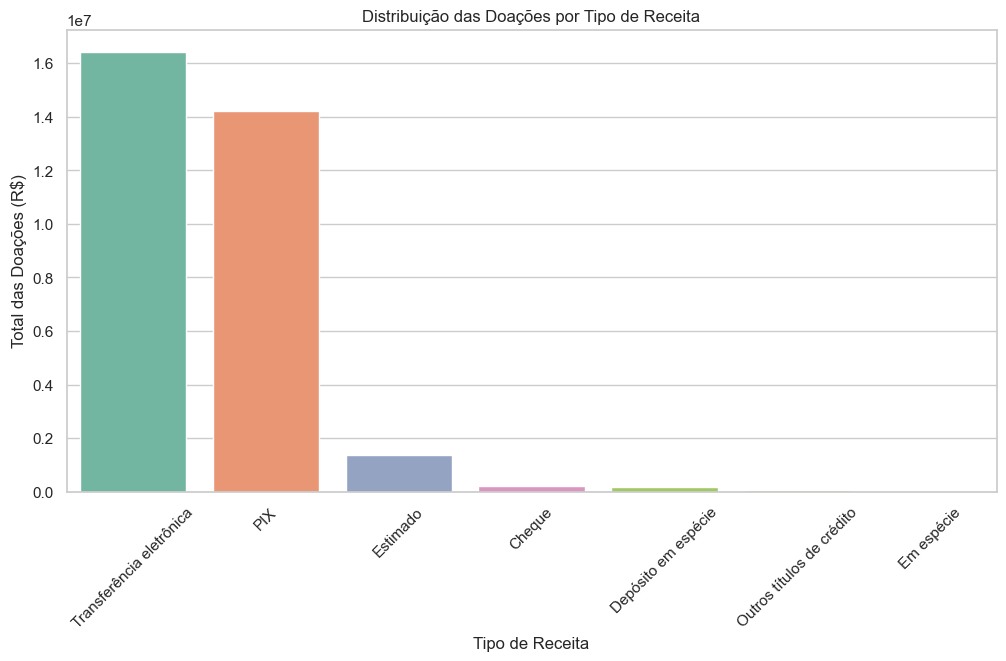

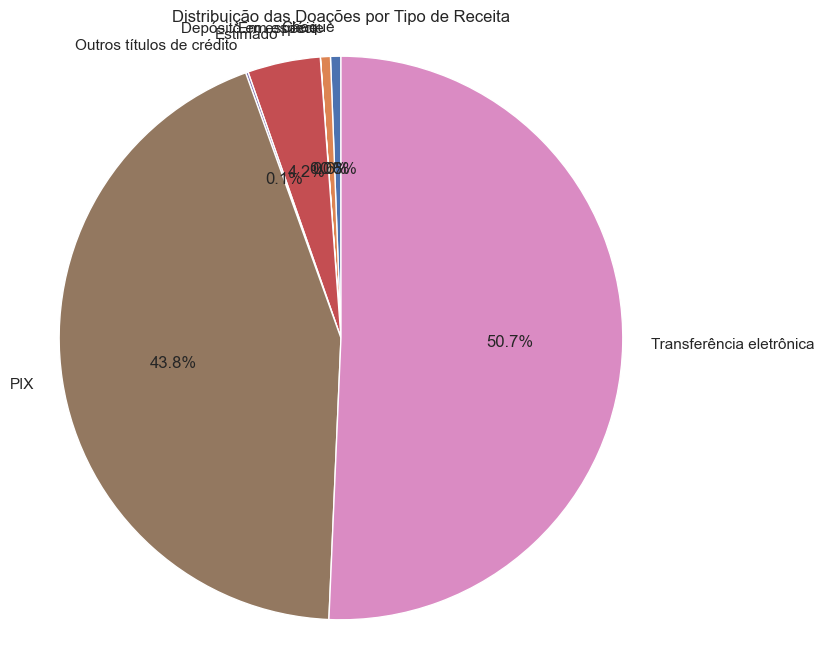

In [314]:


doadores_por_esfera = doadores_infratores.groupby('DS_ESFERA_PARTIDARIA_DOADOR').agg({
    'NM_DOADOR': 'nunique'  # Conta o número único de doadores
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=doadores_por_esfera, x='DS_ESFERA_PARTIDARIA_DOADOR', y='NM_DOADOR', palette='Blues')
plt.title('Número de Doadores por Esfera Partidária')
plt.xlabel('Esfera Partidária')
plt.ylabel('Número de Doadores')
plt.xticks(rotation=45)
plt.show()

doacoes_por_tipo = doadores_infratores.groupby('DS_ESPECIE_RECEITA').agg({
    'VR_RECEITA': 'sum'  
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=doacoes_por_tipo.sort_values('VR_RECEITA', ascending=False),
             x='DS_ESPECIE_RECEITA', y='VR_RECEITA', palette='Set2')
plt.title('Distribuição das Doações por Tipo de Receita')
plt.xlabel('Tipo de Receita')
plt.ylabel('Total das Doações (R$)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(doacoes_por_tipo['VR_RECEITA'], labels=doacoes_por_tipo['DS_ESPECIE_RECEITA'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Doações por Tipo de Receita')
plt.axis('equal')  
plt.show()


In [127]:
infracoes_ibama[infracoes_ibama['NOME_INFRATOR'] == 'FACEBOOK SERVIOS ONLINE DO BRASIL LTDA']






,CD_ORIGINAL_AUTO_INFRACAO,VAL_AUTO_INFRACAO,DS_SIT_AUTO_AIE,PASSIVEL_RECUPERACAO,UNID_CONTROLE,FORMA_ENTREGA,DT_ULT_ALTERACAO,UF,SER_AUTO_INFRACAO,DS_WKT,...,DT_INICIO_ATO_INEQUIVOCO,DES_OUTROS_TIPO_AREA,SEQ_AUTO_INFRACAO,UNID_ARRECADACAO,NUM_LATITUDE_AUTO,CD_ACAO_FISCALIZATORIA,DAT_HORA_AUTO_INFRACAO,SIT_CANCELADO,SOLICITACAO_RECURSO,ANO_INFRACAO
567653,None,201000.0,None,None,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,Correios,2024-09-19 21:19:49,DF,E,POINT (-47.861667 -15.766667),...,None,None,1874845,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,"-15,766667",None,2016-04-07 17:02:00,N,None,2016
638405,None,1000000.0,Impresso,S,Coordenação de Fiscalização e Operações,Correios,2024-09-19 21:19:02,SP,None,POINT (-47.847862 -15.802908),...,2018-02-28 00:00:00,None,2054210,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,"-15,802908",8CBBK4F,2021-12-15 13:00:00,N,047096.2021,2021
644760,None,467800.0,Impresso,S,Coordenação de Fiscalização e Operações,Correios,2024-09-19 21:18:58,SP,None,POINT (-46.680556 -23.588056),...,2022-07-01 00:00:00,None,2060819,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,"-23,588056",C3FUH45,2022-07-01 12:00:00,N,048490.2022,2022
644761,None,10120000.0,Impresso,S,Coordenação de Fiscalização e Operações,Correios,2024-09-19 21:18:58,SP,None,POINT (-46.680556 -23.588056),...,2022-07-01 00:00:00,None,2060820,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,"-23,588056",HGQHYUT,2022-07-01 10:00:00,N,048490.2022,2022
652597,None,10120000.0,Impresso,S,Coordenação de Fiscalização e Operações,Correios,2024-09-19 21:18:34,SP,None,POINT (-46.68055555556 -23.58805555556),...,2022-07-01 00:00:00,None,2091368,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,"-23,58805555556",WP7K7EJ,2022-07-01 10:20:05,N,048490.2022,2022
